# Machine Learning
 > Bu notebook btkakademi/makine öğrenmesi kursundaki notları içermektedir.


In [ ]:
# Standart Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/data/veriler.csv")
df

ulke  boy  kilo  yas cinsiyet
0    tr  130    30   10        e
1    tr  125    36   11        e
2    tr  135    34   10        k
3    tr  133    30    9        k
4    tr  129    38   12        e
5    tr  180    90   30        e
6    tr  190    80   25        e
7    tr  175    90   35        e
8    tr  177    60   22        k
9    us  185   105   33        e
10   us  165    55   27        k
11   us  155    50   44        k
12   us  160    58   39        k
13   us  162    59   41        k
14   us  167    62   55        k
15   fr  174    70   47        e
16   fr  193    90   23        e
17   fr  187    80   27        e
18   fr  183    88   28        e
19   fr  159    40   29        k
20   fr  164    66   32        k
21   fr  166    56   42        k

In [ ]:
boykilo = df[["boy","kilo"]]
boykilo

boy  kilo
0   130    30
1   125    36
2   135    34
3   133    30
4   129    38
5   180    90
6   190    80
7   175    90
8   177    60
9   185   105
10  165    55
11  155    50
12  160    58
13  162    59
14  167    62
15  174    70
16  193    90
17  187    80
18  183    88
19  159    40
20  164    66
21  166    56

### Imputing

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/data/eksikveriler.csv")
df

ulke  boy  kilo   yas cinsiyet
0    tr  130    30  10.0        e
1    tr  125    36  11.0        e
2    tr  135    34  10.0        k
3    tr  133    30   9.0        k
4    tr  129    38  12.0        e
5    tr  180    90  30.0        e
6    tr  190    80  25.0        e
7    tr  175    90  35.0        e
8    tr  177    60  22.0        k
9    us  185   105  33.0        e
10   us  165    55  27.0        k
11   us  155    50  44.0        k
12   us  160    58   NaN        k
13   us  162    59  41.0        k
14   us  167    62  55.0        k
15   fr  174    70  47.0        e
16   fr  193    90   NaN        e
17   fr  187    80  27.0        e
18   fr  183    88  28.0        e
19   fr  159    40  29.0        k
20   fr  164    66  32.0        k
21   fr  166    56  42.0        k

In [ ]:
df.isna().sum()
#df.fillna() kullaniladabilirdi.

ulke        0
boy         0
kilo        0
yas         2
cinsiyet    0
dtype: int64

Yas = df["yas"]
Yas

df["yas"] = df["yas"].fillna(value=np.mean(df["yas"]).astype(int))
df["yas"]

In [ ]:
# Doğru yöntem
df[["yas"]]
# Yanlış yöntem
df["yas"]


0     10.0
1     11.0
2     10.0
3      9.0
4     12.0
5     30.0
6     25.0
7     35.0
8     22.0
9     33.0
10    27.0
11    44.0
12     NaN
13    41.0
14    55.0
15    47.0
16     NaN
17    27.0
18    28.0
19    29.0
20    32.0
21    42.0
Name: yas, dtype: float64

In [ ]:
# Column bu şekilde seçilmeli
df.iloc[:,3:4]

yas
0   10.0
1   11.0
2   10.0
3    9.0
4   12.0
5   30.0
6   25.0
7   35.0
8   22.0
9   33.0
10  27.0
11  44.0
12   NaN
13  41.0
14  55.0
15  47.0
16   NaN
17  27.0
18  28.0
19  29.0
20  32.0
21  42.0

In [ ]:
from sklearn.impute import SimpleImputer

Imputer = SimpleImputer(missing_values=np.nan, strategy="mean")

Imputer = Imputer.fit(df.iloc[:,3:4])

df.iloc[:, 3:4] = Imputer.transform(df.iloc[:, 3:4]).astype(int)

df

<ipython-input-141-bd81ec42c352>:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, 3:4] = Imputer.transform(df.iloc[:, 3:4]).astype(int)


ulke  boy  kilo  yas cinsiyet
0    tr  130    30   10        e
1    tr  125    36   11        e
2    tr  135    34   10        k
3    tr  133    30    9        k
4    tr  129    38   12        e
5    tr  180    90   30        e
6    tr  190    80   25        e
7    tr  175    90   35        e
8    tr  177    60   22        k
9    us  185   105   33        e
10   us  165    55   27        k
11   us  155    50   44        k
12   us  160    58   28        k
13   us  162    59   41        k
14   us  167    62   55        k
15   fr  174    70   47        e
16   fr  193    90   28        e
17   fr  187    80   27        e
18   fr  183    88   28        e
19   fr  159    40   29        k
20   fr  164    66   32        k
21   fr  166    56   42        k

### Encoding

In [ ]:
ulke = df.iloc[:,0:1].values
ulke

array([['tr'],
       ['tr'],
       ['tr'],
       ['tr'],
       ['tr'],
       ['tr'],
       ['tr'],
       ['tr'],
       ['tr'],
       ['us'],
       ['us'],
       ['us'],
       ['us'],
       ['us'],
       ['us'],
       ['fr'],
       ['fr'],
       ['fr'],
       ['fr'],
       ['fr'],
       ['fr'],
       ['fr']], dtype=object)

In [ ]:
### LabelEncoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
ulke = df.iloc[:,0:1].values
ulke[:,0] = le.fit_transform(df.iloc[:,0])
print(ulke)

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


In [ ]:
# OneHot Encoder
ohe = preprocessing.OneHotEncoder()
ulke = ohe.fit_transform(ulke).toarray()
print(ulke)

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [ ]:
# DataFrame
sonuc = pd.DataFrame(data=ulke, index = range(22), columns= ["fr", "tr", "us"])
sonuc

fr   tr   us
0   0.0  1.0  0.0
1   0.0  1.0  0.0
2   0.0  1.0  0.0
3   0.0  1.0  0.0
4   0.0  1.0  0.0
5   0.0  1.0  0.0
6   0.0  1.0  0.0
7   0.0  1.0  0.0
8   0.0  1.0  0.0
9   0.0  0.0  1.0
10  0.0  0.0  1.0
11  0.0  0.0  1.0
12  0.0  0.0  1.0
13  0.0  0.0  1.0
14  0.0  0.0  1.0
15  1.0  0.0  0.0
16  1.0  0.0  0.0
17  1.0  0.0  0.0
18  1.0  0.0  0.0
19  1.0  0.0  0.0
20  1.0  0.0  0.0
21  1.0  0.0  0.0

In [ ]:
Yas = df.iloc[:,1:4].values
sonuc2 = pd.DataFrame(data=Yas, index=range(22), columns=["boy", "kilo", "yas"])
sonuc2

boy  kilo  yas
0   130    30   10
1   125    36   11
2   135    34   10
3   133    30    9
4   129    38   12
5   180    90   30
6   190    80   25
7   175    90   35
8   177    60   22
9   185   105   33
10  165    55   27
11  155    50   44
12  160    58   28
13  162    59   41
14  167    62   55
15  174    70   47
16  193    90   28
17  187    80   27
18  183    88   28
19  159    40   29
20  164    66   32
21  166    56   42

> Daha basit encoding örneği
2- Regression ödevinden..

In [ ]:
# Label Encoder windy ve play için mantıklıdır fakat outlook oneHotEncode edilmelidir.
# Humidity ve temperature ise numerictir, labelencoder kategorik ele almıştır.
veriler2 = df.apply(preprocessing.LabelEncoder().fit_transform)
veriler2


outlook  temperature  humidity  windy  play
0         2           11         4      0     0
1         2            8         6      1     0
2         0           10         5      0     1
3         1            4         9      0     1
4         1            2         3      0     1
5         1            1         1      1     0
6         0            0         0      1     1
7         2            6         8      0     0
8         2            3         1      0     1
9         1            7         3      0     1
10        2            7         1      1     1
11        0            6         6      1     1
12        0            9         2      0     1
13        1            5         7      1     0

In [ ]:
cinsiyet = df.iloc[:, -1].values
cinsiyet

array(['e', 'e', 'k', 'k', 'e', 'e', 'e', 'e', 'k', 'e', 'k', 'k', 'k',
       'k', 'k', 'e', 'e', 'e', 'e', 'k', 'k', 'k'], dtype=object)

In [ ]:
sonuc3 = pd.DataFrame(data=cinsiyet, index=range(22), columns=["cinsiyet"])
sonuc3

cinsiyet
0         e
1         e
2         k
3         k
4         e
5         e
6         e
7         e
8         k
9         e
10        k
11        k
12        k
13        k
14        k
15        e
16        e
17        e
18        e
19        k
20        k
21        k

###DataFrame Birleştirme

In [ ]:
s = pd.concat([sonuc,sonuc2], axis=1)
s

fr   tr   us  boy  kilo  yas
0   0.0  1.0  0.0  130    30   10
1   0.0  1.0  0.0  125    36   11
2   0.0  1.0  0.0  135    34   10
3   0.0  1.0  0.0  133    30    9
4   0.0  1.0  0.0  129    38   12
5   0.0  1.0  0.0  180    90   30
6   0.0  1.0  0.0  190    80   25
7   0.0  1.0  0.0  175    90   35
8   0.0  1.0  0.0  177    60   22
9   0.0  0.0  1.0  185   105   33
10  0.0  0.0  1.0  165    55   27
11  0.0  0.0  1.0  155    50   44
12  0.0  0.0  1.0  160    58   28
13  0.0  0.0  1.0  162    59   41
14  0.0  0.0  1.0  167    62   55
15  1.0  0.0  0.0  174    70   47
16  1.0  0.0  0.0  193    90   28
17  1.0  0.0  0.0  187    80   27
18  1.0  0.0  0.0  183    88   28
19  1.0  0.0  0.0  159    40   29
20  1.0  0.0  0.0  164    66   32
21  1.0  0.0  0.0  166    56   42

In [ ]:
s2 = pd.concat([s, sonuc3], axis=1)
s2

fr   tr   us  boy  kilo  yas cinsiyet
0   0.0  1.0  0.0  130    30   10        e
1   0.0  1.0  0.0  125    36   11        e
2   0.0  1.0  0.0  135    34   10        k
3   0.0  1.0  0.0  133    30    9        k
4   0.0  1.0  0.0  129    38   12        e
5   0.0  1.0  0.0  180    90   30        e
6   0.0  1.0  0.0  190    80   25        e
7   0.0  1.0  0.0  175    90   35        e
8   0.0  1.0  0.0  177    60   22        k
9   0.0  0.0  1.0  185   105   33        e
10  0.0  0.0  1.0  165    55   27        k
11  0.0  0.0  1.0  155    50   44        k
12  0.0  0.0  1.0  160    58   28        k
13  0.0  0.0  1.0  162    59   41        k
14  0.0  0.0  1.0  167    62   55        k
15  1.0  0.0  0.0  174    70   47        e
16  1.0  0.0  0.0  193    90   28        e
17  1.0  0.0  0.0  187    80   27        e
18  1.0  0.0  0.0  183    88   28        e
19  1.0  0.0  0.0  159    40   29        k
20  1.0  0.0  0.0  164    66   32        k
21  1.0  0.0  0.0  166    56   42        k

###Veriyi train & test split olarak bölmek


In [ ]:
from sklearn.model_selection import train_test_split


X = s # diğer değişkenler
y = sonuc3 # cinsiyet


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((17, 6), (17, 1), (5, 6), (5, 1))

### Simple Preprocessing(Standard Scaler)

In [ ]:
from sklearn.preprocessing import StandardScaler
# Veriyi scale etmeye yarar yani birbirine göre ölçekleyerek sayıları küçültür.
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
X_train, X_test

(array([[ 1.3540064 , -0.94280904, -0.46291005,  0.03026252, -0.33896772,
          1.3227892 ],
        [-0.73854895, -0.94280904,  2.1602469 , -0.48420035, -0.59133784,
          1.4991611 ],
        [ 1.3540064 , -0.94280904, -0.46291005, -0.29712294, -1.01195472,
          0.17637189],
        [-0.73854895,  1.06066017, -0.46291005,  0.54472539, -0.17072097,
         -0.44092973],
        [-0.73854895,  1.06066017, -0.46291005,  1.15272697,  0.67051278,
         -0.17637189],
        [ 1.3540064 , -0.94280904, -0.46291005,  1.29303502,  1.09112966,
          0.08818595],
        [-0.73854895,  1.06066017, -0.46291005, -1.7002035 , -1.09607809,
         -1.3227892 ],
        [-0.73854895,  1.06066017, -0.46291005, -1.41958739, -1.26432484,
         -1.4991611 ],
        [-0.73854895,  1.06066017, -0.46291005,  0.68503345,  1.09112966,
          0.26455784],
        [ 1.3540064 , -0.94280904, -0.46291005,  1.01241891,  0.67051278,
          0.        ],
        [-0.73854895, -0.94280

# ML Algorithms

## Prediction Algorithms

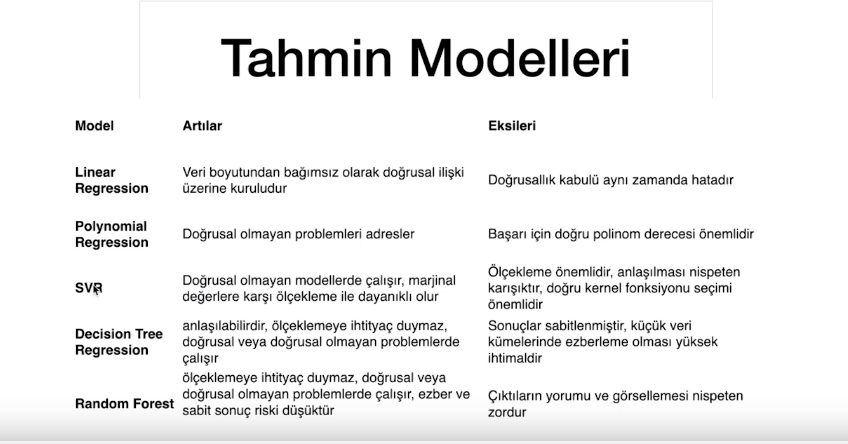

### 1-Simple Linear Regression

Tek bir bağımsız değişken varsa(x) simple linear regression kullanılır. Birden fazla parametre kullanmak istiyorsak Multiple Linear Regression kullanılır.

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/data/bilkav.com_satislar.csv")
df

Aylar  Satislar
0       8   19671.5
1      10   23102.5
2      11   18865.5
3      13   21762.5
4      14   19945.5
5      19   28321.0
6      19   30075.0
7      20   27222.5
8      20   32222.5
9      24   28594.5
10     25   31609.0
11     25   27897.0
12     25   28478.5
13     26   28540.5
14     29   30555.5
15     31   33969.0
16     32   33014.5
17     34   41544.0
18     37   40681.5
19     37    4697.0
20     42   45869.0
21     44   49136.5
22     49   50651.0
23     50   56906.0
24     54   54715.5
25     55   52791.0
26     59   58484.5
27     59   56317.5
28     64   61195.5
29     65   60936.0

In [ ]:
# 19. indexte aykırı veri var. Silelim
df = df.drop(index=19, axis=0)
df = df.reset_index(drop=True)
df

Aylar  Satislar
0       8   19671.5
1      10   23102.5
2      11   18865.5
3      13   21762.5
4      14   19945.5
5      19   28321.0
6      19   30075.0
7      20   27222.5
8      20   32222.5
9      24   28594.5
10     25   31609.0
11     25   27897.0
12     25   28478.5
13     26   28540.5
14     29   30555.5
15     31   33969.0
16     32   33014.5
17     34   41544.0
18     37   40681.5
19     42   45869.0
20     44   49136.5
21     49   50651.0
22     50   56906.0
23     54   54715.5
24     55   52791.0
25     59   58484.5
26     59   56317.5
27     64   61195.5
28     65   60936.0

Amaç noktaların(gerçek satış değerleri) çizilen doğruya uzaklıklarının toplamını minimum tutmaktır.
Model bizim için minimum olan doğruyu çizer.
Predictionda da x yerine yerleştirilerek y bulunur.(tabiki de doğru üzerindedir.)

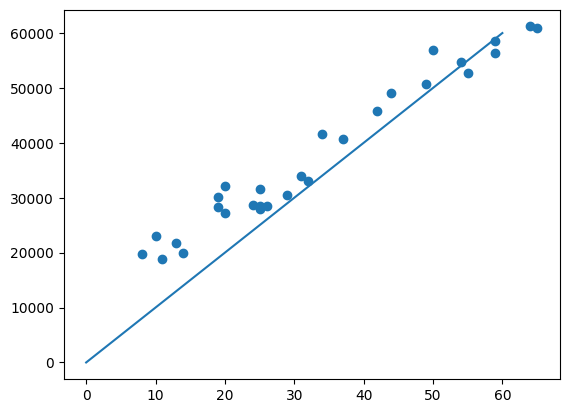

In [ ]:
#Örnek
plt.scatter(x=df["Aylar"], y=df["Satislar"]) # Noktalar(Gerçek değerler)
x = np.linspace(0, 60, 1000)
plt.plot(x, x*1000, linestyle='-');  # Örnek simple linear line(ax + b)

In [ ]:
aylar = df[["Aylar"]]
aylar

Aylar
0       8
1      10
2      11
3      13
4      14
5      19
6      19
7      20
8      20
9      24
10     25
11     25
12     25
13     26
14     29
15     31
16     32
17     34
18     37
19     42
20     44
21     49
22     50
23     54
24     55
25     59
26     59
27     64
28     65

In [ ]:
satislar = df[["Satislar"]]
satislar

Satislar
0    19671.5
1    23102.5
2    18865.5
3    21762.5
4    19945.5
5    28321.0
6    30075.0
7    27222.5
8    32222.5
9    28594.5
10   31609.0
11   27897.0
12   28478.5
13   28540.5
14   30555.5
15   33969.0
16   33014.5
17   41544.0
18   40681.5
19   45869.0
20   49136.5
21   50651.0
22   56906.0
23   54715.5
24   52791.0
25   58484.5
26   56317.5
27   61195.5
28   60936.0

In [ ]:
from pandas.core.common import random_state
np.random.seed(27)
# Train & test split
X = aylar
y = satislar

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=27)

# Verilerin ölçeklenmesi(küçültülerek oranlanması)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

y_train = sc.fit_transform(y_train)
y_test = sc.fit_transform(y_test)


X_train, X_test, y_train, y_test

(array([[ 0.96780388],
        [-0.39502199],
        [ 1.25172594],
        [-1.36035699],
        [ 1.535648  ],
        [-0.39502199],
        [-1.07643493],
        [-0.73572846],
        [-1.01965052],
        [ 0.28639095],
        [ 1.87635447],
        [-0.16788435],
        [-1.24678817],
        [-0.39502199],
        [-1.19000376],
        [ 0.11603771],
        [-0.33823758],
        [-0.73572846],
        [ 0.00246889],
        [ 1.81957006],
        [-0.67894405],
        [ 1.30851035],
        [ 0.570313  ]]),
 array([[-0.49705012],
        [-0.99410024],
        [ 0.85208592],
        [ 0.42604296],
        [-1.27812888],
        [ 1.49115037]]),
 array([[ 1.03245785],
        [-0.63499644],
        [ 1.33031177],
        [-1.23777596],
        [ 1.60651091],
        [-0.59238307],
        [-1.0845437 ],
        [-0.47538866],
        [-1.21769675],
        [ 0.30187486],
        [ 1.78616126],
        [-0.44017675],
        [-0.98634607],
        [-0.36297436],
       

In [ ]:
# Import and fit & score the model
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

lr.score(X_test, y_test)

0.9518079417602633

In [ ]:
y_predict = lr.predict(X_test)
y_predict

array([[-0.48878892],
       [-0.97757784],
       [ 0.83792386],
       [ 0.41896193],
       [-1.25688579],
       [ 1.46636676]])

In [ ]:
# Scale etmeden üstteki hücreleri uygularsak
from pandas.core.common import random_state
np.random.seed(27)
# Train & test split
X = aylar
y = satislar

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=27)


lr = LinearRegression()

lr.fit(X_train, y_train)

y_preds = lr.predict(X_test)

y_test, y_preds

(    Satislar
 15   33969.0
 9    28594.5
 22   56906.0
 20   49136.5
 7    27222.5
 26   56317.5,
 array([[35833.26230967],
        [30499.27284863],
        [50311.23370393],
        [45739.24273732],
        [27451.27887089],
        [57169.22015385]]))

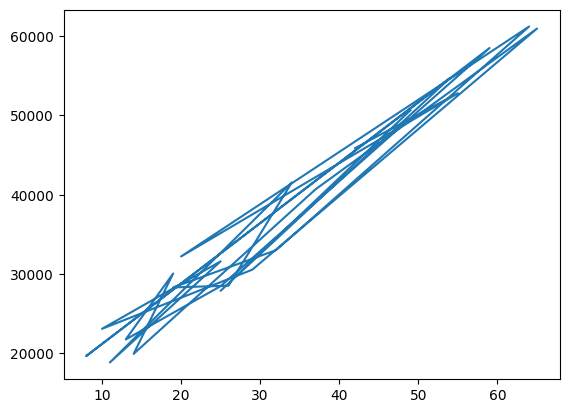

In [ ]:
# Visualize Simple Linear Regression with preds
fig, ax = plt.subplots() # using the variable ax for single a Axes
ax.plot(X_train, y_train)
# using the variable axs for multiple Axes
#fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)




In [ ]:
# using the variable axs for multiple Axes
#fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

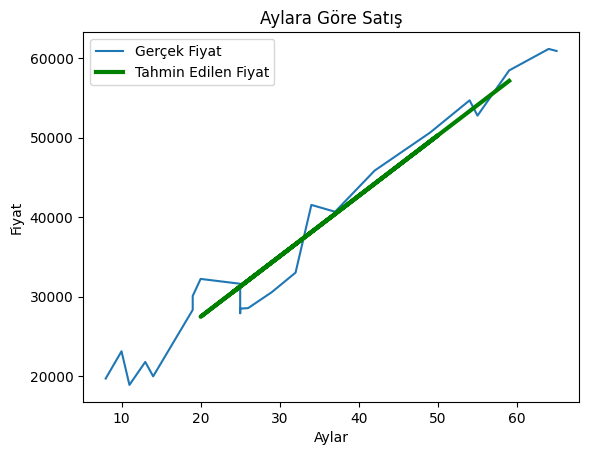

In [ ]:
# Train test splitte veriler karıştırıldığı (shuffle) için aylar da karıştı.
# Bu nedenle plot saçmaladı. Veriyi aya göre tekrar sıralayacağız.

X_train = X_train.sort_index() # Indexler aya göre sıralandığı için
y_train = y_train.sort_index()

# Dikkat X_test sortlanmayacak çünkü y_preds sortlu değil

fig, ax = plt.subplots() # using the variable ax for single a Axes
fiyat = ax.plot(X_train, y_train);
tahmin = ax.plot(X_test, y_preds, color='green', linewidth=3 ); # Simple Linear Regression

ax.set_xlabel("Aylar")
ax.set_ylabel("Fiyat")
ax.set_title("Aylara Göre Satış")
ax.legend(["Gerçek Fiyat", "Tahmin Edilen Fiyat"]);

### 2-Multiple Linear Regression

Simple Linear Regression'da
y = ax + b + e  (e hata payı)

Multiple Linear Regression'da
y = a1x + a2x + a3x + b + e (a1 boy, a2 kilo..)

Her ikisi de birinci dereceden denklemdir.

> Dummy Variable (Kukla Değişken)


ML algoritmalarında tüm column'lar sonuca etki eder, dolayısıyla columnların büyük oranda benzer şeyi anlatması çıkarılmasını gerektirir. Bazı ML algoritmaları buna karşı dirençlidir.

Örneğin;
- Cinsiyet sütununu onehot encoding ile erkek ve kadın sütunlarına dönüştürüp 0 1 ile işaretledik. Burada hem cinsiyet hem erkeği kaldırabiliriz. Çünkü kadın sütunu 0 demek cinsiyetin erkek olduğunu bize anlatır. 1 ise kadın olduğunu.. 2 ayrı sütuna ihtiyaç yoktur.


> p- value (olasılık değeri)

H0: null hypothesis: Farksızlık hipotesi, sıfır hipotezi, boş hipotez

H1: Alternatif hipotes(H0 'ın tersi)

p-değeri: olasılık değeri(genelde 0.05 alınır) %5

p-değeri küçüldükçe H0 hatalı olma ihtimali artar

p-değeri büyüdükçe H1 hatalı olma ihtimali artar.

p-değeri aslında ne kadar örnek bularak Hipotezi çürütebiliriz?



> Değişken Seçimi

  Çok değişkenli modellerde bütün değişkenler kullanılmalı?

  Bazı değişkenler sisteme etkisiz veya olumsuz etki yaratabilir.

1. Bütün Değişkenleri Dahil Etmek

2. Geriye Doğru Eleme(Backward Elimination)

3. İleri Seçim (Forward Selection)

4. İki Yönlü eleme (bidirectional elimination)

5. Skor karşılaştırılması (Score Comparison)

In [ ]:
# Import and show data
df = pd.read_csv("/content/drive/MyDrive/data/veriler.csv")
df

ulke  boy  kilo  yas cinsiyet
0    tr  130    30   10        e
1    tr  125    36   11        e
2    tr  135    34   10        k
3    tr  133    30    9        k
4    tr  129    38   12        e
5    tr  180    90   30        e
6    tr  190    80   25        e
7    tr  175    90   35        e
8    tr  177    60   22        k
9    us  185   105   33        e
10   us  165    55   27        k
11   us  155    50   44        k
12   us  160    58   39        k
13   us  162    59   41        k
14   us  167    62   55        k
15   fr  174    70   47        e
16   fr  193    90   23        e
17   fr  187    80   27        e
18   fr  183    88   28        e
19   fr  159    40   29        k
20   fr  164    66   32        k
21   fr  166    56   42        k

In [ ]:
# One Hot Encoding on Cinsiyet
from sklearn import preprocessing
c = df[["cinsiyet"]]

ohe = preprocessing.OneHotEncoder()
c = ohe.fit_transform(c).toarray()
# Make cinsiyet DataFrame
c = pd.DataFrame(data=c, index = range(22), columns= ["erkek", "kadın"])
c


erkek  kadın
0     1.0    0.0
1     1.0    0.0
2     0.0    1.0
3     0.0    1.0
4     1.0    0.0
5     1.0    0.0
6     1.0    0.0
7     1.0    0.0
8     0.0    1.0
9     1.0    0.0
10    0.0    1.0
11    0.0    1.0
12    0.0    1.0
13    0.0    1.0
14    0.0    1.0
15    1.0    0.0
16    1.0    0.0
17    1.0    0.0
18    1.0    0.0
19    0.0    1.0
20    0.0    1.0
21    0.0    1.0

Burada bir dummy variable(kukla değer) var çünkü erkek değilse kadın, kadın değilse erkektir. Bu nedenle buradaki bir sütunu silebiliriz.

In [ ]:
c = c.drop("erkek", axis=1)
c

kadın
0     0.0
1     0.0
2     1.0
3     1.0
4     0.0
5     0.0
6     0.0
7     0.0
8     1.0
9     0.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    0.0
16    0.0
17    0.0
18    0.0
19    1.0
20    1.0
21    1.0

In [ ]:
# One Hot Encoding on ulke
from sklearn import preprocessing
ulke = df[["ulke"]]

ohe = preprocessing.OneHotEncoder()
ulke = ohe.fit_transform(ulke).toarray()
# Make cinsiyet DataFrame
ulke = pd.DataFrame(data=ulke, index = range(22), columns= ["tr", "us", "fr"])
ulke


tr   us   fr
0   0.0  1.0  0.0
1   0.0  1.0  0.0
2   0.0  1.0  0.0
3   0.0  1.0  0.0
4   0.0  1.0  0.0
5   0.0  1.0  0.0
6   0.0  1.0  0.0
7   0.0  1.0  0.0
8   0.0  1.0  0.0
9   0.0  0.0  1.0
10  0.0  0.0  1.0
11  0.0  0.0  1.0
12  0.0  0.0  1.0
13  0.0  0.0  1.0
14  0.0  0.0  1.0
15  1.0  0.0  0.0
16  1.0  0.0  0.0
17  1.0  0.0  0.0
18  1.0  0.0  0.0
19  1.0  0.0  0.0
20  1.0  0.0  0.0
21  1.0  0.0  0.0

In [ ]:
df

ulke  boy  kilo  yas cinsiyet
0    tr  130    30   10        e
1    tr  125    36   11        e
2    tr  135    34   10        k
3    tr  133    30    9        k
4    tr  129    38   12        e
5    tr  180    90   30        e
6    tr  190    80   25        e
7    tr  175    90   35        e
8    tr  177    60   22        k
9    us  185   105   33        e
10   us  165    55   27        k
11   us  155    50   44        k
12   us  160    58   39        k
13   us  162    59   41        k
14   us  167    62   55        k
15   fr  174    70   47        e
16   fr  193    90   23        e
17   fr  187    80   27        e
18   fr  183    88   28        e
19   fr  159    40   29        k
20   fr  164    66   32        k
21   fr  166    56   42        k

Mevcut dataframe ile oluşturduklarımızı birleştirelim

In [ ]:
s = pd.concat([c, ulke], axis=1)
s

kadın   tr   us   fr
0     0.0  0.0  1.0  0.0
1     0.0  0.0  1.0  0.0
2     1.0  0.0  1.0  0.0
3     1.0  0.0  1.0  0.0
4     0.0  0.0  1.0  0.0
5     0.0  0.0  1.0  0.0
6     0.0  0.0  1.0  0.0
7     0.0  0.0  1.0  0.0
8     1.0  0.0  1.0  0.0
9     0.0  0.0  0.0  1.0
10    1.0  0.0  0.0  1.0
11    1.0  0.0  0.0  1.0
12    1.0  0.0  0.0  1.0
13    1.0  0.0  0.0  1.0
14    1.0  0.0  0.0  1.0
15    0.0  1.0  0.0  0.0
16    0.0  1.0  0.0  0.0
17    0.0  1.0  0.0  0.0
18    0.0  1.0  0.0  0.0
19    1.0  1.0  0.0  0.0
20    1.0  1.0  0.0  0.0
21    1.0  1.0  0.0  0.0

In [ ]:
df = pd.concat([df.iloc[:,1:4], s], axis=1)
df

boy  kilo  yas  kadın   tr   us   fr
0   130    30   10    0.0  0.0  1.0  0.0
1   125    36   11    0.0  0.0  1.0  0.0
2   135    34   10    1.0  0.0  1.0  0.0
3   133    30    9    1.0  0.0  1.0  0.0
4   129    38   12    0.0  0.0  1.0  0.0
5   180    90   30    0.0  0.0  1.0  0.0
6   190    80   25    0.0  0.0  1.0  0.0
7   175    90   35    0.0  0.0  1.0  0.0
8   177    60   22    1.0  0.0  1.0  0.0
9   185   105   33    0.0  0.0  0.0  1.0
10  165    55   27    1.0  0.0  0.0  1.0
11  155    50   44    1.0  0.0  0.0  1.0
12  160    58   39    1.0  0.0  0.0  1.0
13  162    59   41    1.0  0.0  0.0  1.0
14  167    62   55    1.0  0.0  0.0  1.0
15  174    70   47    0.0  1.0  0.0  0.0
16  193    90   23    0.0  1.0  0.0  0.0
17  187    80   27    0.0  1.0  0.0  0.0
18  183    88   28    0.0  1.0  0.0  0.0
19  159    40   29    1.0  1.0  0.0  0.0
20  164    66   32    1.0  1.0  0.0  0.0
21  166    56   42    1.0  1.0  0.0  0.0

Veriler scale de edilebilirdi.

In [ ]:
# Split data into train & test sets

from sklearn.model_selection import train_test_split
np.random.seed(27)

X = df.drop("yas", axis=1)
y= df["yas"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((17, 6), (5, 6), (17,), (5,))

In [ ]:
# Fit the model

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)
regressor.score(X_test, y_test)

0.13510438120292234

In [ ]:
y_preds = regressor.predict(X_test)
y_preds, y_test

(array([38.90935223, 53.85024665, 41.31976511, 38.35891871,  8.25058541]),
 18    28
 9     33
 12    39
 11    44
 0     10
 Name: yas, dtype: int64)

In [ ]:
# Bu sefer de boyu tahmin etmeye çalışalım

# Split data into train & test sets

from sklearn.model_selection import train_test_split
np.random.seed(27)

X = df.drop("boy", axis=1)
y= df["boy"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((17, 6), (5, 6), (17,), (5,))

In [ ]:
# Fit the model

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)
regressor.score(X_test, y_test)

0.7603368062528209

In [ ]:
y_preds = regressor.predict(X_test)
y_preds, y_test

(array([191.3125067 , 203.95626656, 164.17167836, 155.10591105,
        123.34363185]),
 18    183
 9     185
 12    160
 11    155
 0     130
 Name: boy, dtype: int64)

> ÖDEV TENİS

outlook,temperature,humidity(nem),windy,play

humidity'i multi linear regression ile tahmin et

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("/content/drive/MyDrive/data/bilkav.com_odev_tenis.csv")
df

outlook  temperature  humidity  windy play
0      sunny           85        85  False   no
1      sunny           80        90   True   no
2   overcast           83        86  False  yes
3      rainy           70        96  False  yes
4      rainy           68        80  False  yes
5      rainy           65        70   True   no
6   overcast           64        65   True  yes
7      sunny           72        95  False   no
8      sunny           69        70  False  yes
9      rainy           75        80  False  yes
10     sunny           75        70   True  yes
11  overcast           72        90   True  yes
12  overcast           81        75  False  yes
13     rainy           71        91   True   no

Yapılması gerekenler;

1. NaN value varsa imputing

2. Encoding

3. Data split into train & test sets

4. Modeli fit & evaluate

In [ ]:
# NaN value check

df.isna().sum()

outlook        0
temperature    0
humidity       0
windy          0
play           0
dtype: int64

Outlook one hot encoder ile encode edilecek.
windy ve play için 0 veya 1  ile temsil edilen tek bir column yeterli olacaktır.

In [ ]:
outlook = df[["outlook"]]
outlook

outlook
0      sunny
1      sunny
2   overcast
3      rainy
4      rainy
5      rainy
6   overcast
7      sunny
8      sunny
9      rainy
10     sunny
11  overcast
12  overcast
13     rainy

> Daha basit ve güzel bir encoder yöntemi

In [ ]:
# Label Encoder windy ve play için mantıklıdır fakat outlook oneHotEncode edilmelidir.
# Humidity ve temperature ise numerictir, labelencoder kategorik ele almıştır.
veriler2 = df.apply(preprocessing.LabelEncoder().fit_transform)
veriler2


outlook  temperature  humidity  windy  play
0         2           11         4      0     0
1         2            8         6      1     0
2         0           10         5      0     1
3         1            4         9      0     1
4         1            2         3      0     1
5         1            1         1      1     0
6         0            0         0      1     1
7         2            6         8      0     0
8         2            3         1      0     1
9         1            7         3      0     1
10        2            7         1      1     1
11        0            6         6      1     1
12        0            9         2      0     1
13        1            5         7      1     0

In [ ]:
# OneHot Encoder

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
outlook = ohe.fit_transform(outlook).toarray()
print(outlook)

[[0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [ ]:
# DataFrame
outlook = pd.DataFrame(data=outlook, index = range(14), columns= ["overcast", "rainy", "sunny"])
outlook

overcast  rainy  sunny
0        0.0    0.0    1.0
1        0.0    0.0    1.0
2        1.0    0.0    0.0
3        0.0    1.0    0.0
4        0.0    1.0    0.0
5        0.0    1.0    0.0
6        1.0    0.0    0.0
7        0.0    0.0    1.0
8        0.0    0.0    1.0
9        0.0    1.0    0.0
10       0.0    0.0    1.0
11       1.0    0.0    0.0
12       1.0    0.0    0.0
13       0.0    1.0    0.0

In [ ]:
# windy ve play için label encoding de kullanılabilir.
### LabelEncoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
wind = df.iloc[:,3:4].values
wind = le.fit_transform(wind)
print(wind)

[0 1 0 0 0 1 1 0 0 0 1 1 0 1]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
wind

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1])

In [ ]:
# DataFrame

wind = pd.DataFrame(data=wind, index = range(14), columns=["wind"])
wind

wind
0      0
1      1
2      0
3      0
4      0
5      1
6      1
7      0
8      0
9      0
10     1
11     1
12     0
13     1

In [ ]:
### LabelEncoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
play = df.iloc[:,4:5].values
play = le.fit_transform(play)
print(play)

[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# DataFrame

play = pd.DataFrame(data=play, index = range(14), columns=["play"])
play

play
0      0
1      0
2      1
3      1
4      1
5      0
6      1
7      0
8      1
9      1
10     1
11     1
12     1
13     0

In [ ]:
s = pd.concat([wind, play], axis = 1)
s

wind  play
0      0     0
1      1     0
2      0     1
3      0     1
4      0     1
5      1     0
6      1     1
7      0     0
8      0     1
9      0     1
10     1     1
11     1     1
12     0     1
13     1     0

In [ ]:
s2 = pd.concat([outlook, s], axis=1)
s2

overcast  rainy  sunny  wind  play
0        0.0    0.0    1.0     0     0
1        0.0    0.0    1.0     1     0
2        1.0    0.0    0.0     0     1
3        0.0    1.0    0.0     0     1
4        0.0    1.0    0.0     0     1
5        0.0    1.0    0.0     1     0
6        1.0    0.0    0.0     1     1
7        0.0    0.0    1.0     0     0
8        0.0    0.0    1.0     0     1
9        0.0    1.0    0.0     0     1
10       0.0    0.0    1.0     1     1
11       1.0    0.0    0.0     1     1
12       1.0    0.0    0.0     0     1
13       0.0    1.0    0.0     1     0

In [ ]:
s3 = pd.concat([df.iloc[:, 1:3], s2], axis=1)
s3

temperature  humidity  overcast  rainy  sunny  wind  play
0            85        85       0.0    0.0    1.0     0     0
1            80        90       0.0    0.0    1.0     1     0
2            83        86       1.0    0.0    0.0     0     1
3            70        96       0.0    1.0    0.0     0     1
4            68        80       0.0    1.0    0.0     0     1
5            65        70       0.0    1.0    0.0     1     0
6            64        65       1.0    0.0    0.0     1     1
7            72        95       0.0    0.0    1.0     0     0
8            69        70       0.0    0.0    1.0     0     1
9            75        80       0.0    1.0    0.0     0     1
10           75        70       0.0    0.0    1.0     1     1
11           72        90       1.0    0.0    0.0     1     1
12           81        75       1.0    0.0    0.0     0     1
13           71        91       0.0    1.0    0.0     1     0

In [ ]:
# Split the data into train & test split
from sklearn.model_selection import train_test_split

X = s3.drop("humidity", axis=1)
y = s3["humidity"]



X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=27
                                                    )

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11, 6), (3, 6), (11,), (3,))

In [ ]:
# Fit the model & evaluate

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)
regressor.score(X_test, y_test)

-3.999974916096013

In [ ]:
y_preds = regressor.predict(X_test)
y_preds, y_test

(array([71.44686192, 79.43849372, 84.05271967]),
 7     95
 4     80
 13    91
 Name: humidity, dtype: int64)

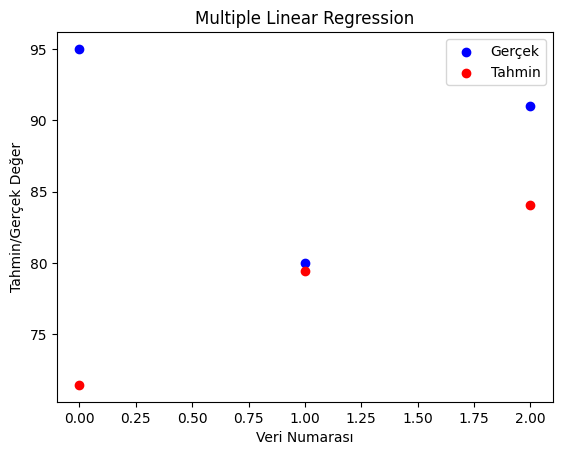

In [ ]:
# Visualize our model
import matplotlib.pyplot as plt
import numpy as np


def plotGraph(y_test,y_pred,regressorName):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.scatter(range(len(y_test)), y_test, color='blue')
    plt.scatter(range(len(y_pred)), y_pred, color='red')
    plt.title(regressorName)
    plt.xlabel("Veri Numarası")
    plt.ylabel("Tahmin/Gerçek Değer")
    plt.legend(["Gerçek", "Tahmin"])
    plt.show()
    return

plotGraph(y_test, y_preds, "Multiple Linear Regression")

> Backward Elimination

1. p-value hesaplama

In [ ]:
s3

temperature  humidity  overcast  rainy  sunny  wind  play
0            85        85       0.0    0.0    1.0     0     0
1            80        90       0.0    0.0    1.0     1     0
2            83        86       1.0    0.0    0.0     0     1
3            70        96       0.0    1.0    0.0     0     1
4            68        80       0.0    1.0    0.0     0     1
5            65        70       0.0    1.0    0.0     1     0
6            64        65       1.0    0.0    0.0     1     1
7            72        95       0.0    0.0    1.0     0     0
8            69        70       0.0    0.0    1.0     0     1
9            75        80       0.0    1.0    0.0     0     1
10           75        70       0.0    0.0    1.0     1     1
11           72        90       1.0    0.0    0.0     1     1
12           81        75       1.0    0.0    0.0     0     1
13           71        91       0.0    1.0    0.0     1     0

In [ ]:
X_l = s3.iloc[:,[0,2,3,4,5,6]].values
X_l = np.array(X_l, dtype=float)
X_l

array([[85.,  0.,  0.,  1.,  0.,  0.],
       [80.,  0.,  0.,  1.,  1.,  0.],
       [83.,  1.,  0.,  0.,  0.,  1.],
       [70.,  0.,  1.,  0.,  0.,  1.],
       [68.,  0.,  1.,  0.,  0.,  1.],
       [65.,  0.,  1.,  0.,  1.,  0.],
       [64.,  1.,  0.,  0.,  1.,  1.],
       [72.,  0.,  0.,  1.,  0.,  0.],
       [69.,  0.,  0.,  1.,  0.,  1.],
       [75.,  0.,  1.,  0.,  0.,  1.],
       [75.,  0.,  0.,  1.,  1.,  1.],
       [72.,  1.,  0.,  0.,  1.,  1.],
       [81.,  1.,  0.,  0.,  0.,  1.],
       [71.,  0.,  1.,  0.,  1.,  0.]])

In [ ]:
# Backward Elimination
import statsmodels.api as sm
import numpy as np
X = np.append(arr = np.ones((14,1)).astype(int), values=s3.drop("humidity", axis=1), axis=1 )

X_l = s3.iloc[:,[0,2,3,4,5,6]].values
X_l = np.array(X_l, dtype=float)

y = s3.iloc[:, [1]].values
y = np.array(y, dtype=float)
#endog -y exog -x

model = sm.OLS(endog = y, exog =X_l).fit()

print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                 -0.148
Method:                 Least Squares   F-statistic:                    0.6653
Date:                Mon, 31 Jul 2023   Prob (F-statistic):              0.661
Time:                        15:50:25   Log-Likelihood:                -49.542
No. Observations:                  14   AIC:                             111.1
Df Residuals:                       8   BIC:                             114.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4920      0.597      0.825      0.4

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "



0.593 olan p value 0.5'den yüksek bunu atmalıyız.
X'teki 5.column yani windy atılacak.



In [ ]:
X_train2 = X_train.drop("wind", axis=1)
X_test2 = X_test.drop("wind", axis=1)
X_train2

temperature  overcast  rainy  sunny  play
2            83       1.0    0.0    0.0     1
6            64       1.0    0.0    0.0     1
10           75       0.0    0.0    1.0     1
1            80       0.0    0.0    1.0     0
9            75       0.0    1.0    0.0     1
5            65       0.0    1.0    0.0     0
0            85       0.0    0.0    1.0     0
11           72       1.0    0.0    0.0     1
12           81       1.0    0.0    0.0     1
8            69       0.0    0.0    1.0     1
3            70       0.0    1.0    0.0     1

In [ ]:
# Model tekrardan eğitilecek
# Fit the model & evaluate

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train2, y_train)
y_preds2 = regressor.predict(X_test2)
y_preds2, y_test

(array([74.29694486, 80.10394933, 83.13859911]),
 7     95
 4     80
 13    91
 Name: humidity, dtype: int64)

In [ ]:
y_preds, y_test

(array([71.44686192, 79.43849372, 84.05271967]),
 7     95
 4     80
 13    91
 Name: humidity, dtype: int64)

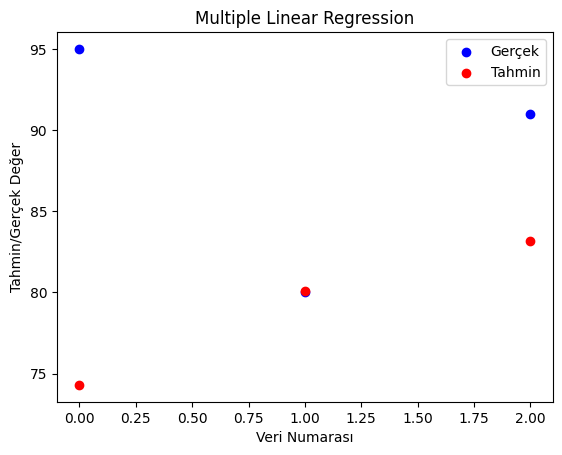

In [ ]:
plotGraph(y_test, y_preds2, "Multiple Linear Regression")

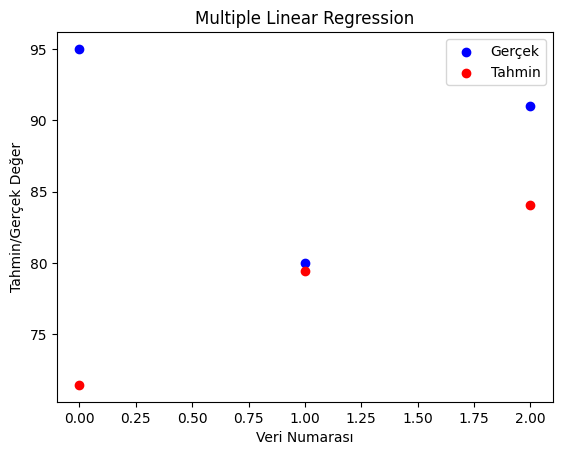

In [ ]:
plotGraph(y_test, y_preds, "Multiple Linear Regression")

P-value > 0.5 olanı çıkardık fakat prediction iyileşmedi.

### 3- Polynomial Regression (Polinom Regresyon)

örn:
y = ax^3 + bx^2 + cx +b + e

Temel mantığı polinom bir çizgi çekilerek geleceğe yönelik tahminler yapılır.

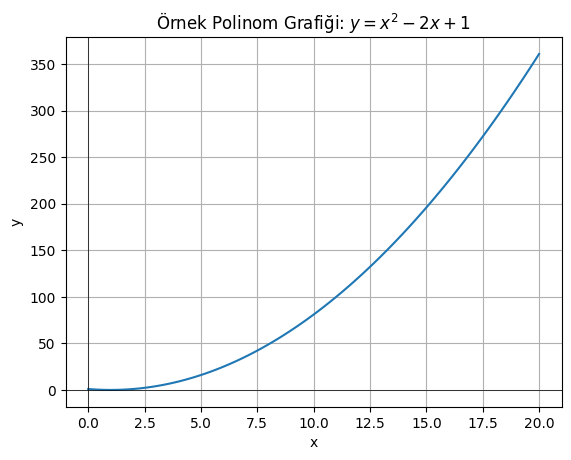

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Örnek veri oluşturalım
x = np.linspace(0, 20, 100)  # 0 ile 20 arasında 100 adet x değeri oluşturuyoruz
coefficients = [1, -2, 1]    # Polinomun katsayıları: 1*x^2 - 2*x + 1

# Polinomu hesaplayalım
y = np.polyval(coefficients, x)

# Grafiği çizelim
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Örnek Polinom Grafiği: $y = x^2 - 2x + 1$')
plt.grid(True)
plt.axhline(0, color='black', lw=0.5)  # x ekseni üzerindeki çizgi
plt.axvline(0, color='black', lw=0.5)  # y ekseni üzerindeki çizgi
plt.show()


In [ ]:
# Import data
df = pd.read_csv("/content/drive/MyDrive/data/bilkav.com_maaslar.csv")
df

unvan  Egitim Seviyesi   maas
0             Cayci                1   2250
1          Sekreter                2   2500
2  Uzman Yardimcisi                3   3000
3             Uzman                4   4000
4  Proje Yoneticisi                5   5500
5               Sef                6   7500
6             Mudur                7  10000
7          Direktor                8  15000
8           C-level                9  25000
9               CEO               10  50000

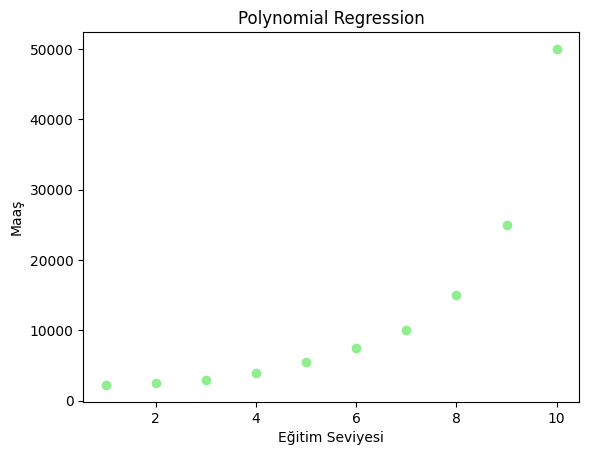

In [ ]:

plt.scatter(df[["Egitim Seviyesi"]],
            df[["maas"]],
            color="lightgreen")
plt.title("Polynomial Regression")
plt.xlabel("Eğitim Seviyesi")
plt.ylabel("Maaş")
plt.show()




In [ ]:
df

unvan  Egitim Seviyesi   maas
0             Cayci                1   2250
1          Sekreter                2   2500
2  Uzman Yardimcisi                3   3000
3             Uzman                4   4000
4  Proje Yoneticisi                5   5500
5               Sef                6   7500
6             Mudur                7  10000
7          Direktor                8  15000
8           C-level                9  25000
9               CEO               10  50000

In [ ]:
# Derste tüm veriler eğitim için kullanıldı.(?)

X = df.iloc[:, 1:2]
y = df.iloc[:, 2:3]
X, y

(   Egitim Seviyesi
 0                1
 1                2
 2                3
 3                4
 4                5
 5                6
 6                7
 7                8
 8                9
 9               10,
     maas
 0   2250
 1   2500
 2   3000
 3   4000
 4   5500
 5   7500
 6  10000
 7  15000
 8  25000
 9  50000)

In [ ]:
#linear regression
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X, y)

LinearRegression()

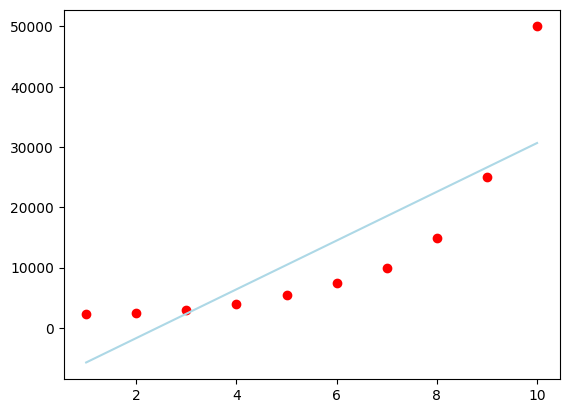

In [ ]:
#visualize linear regression
plt.scatter(X,y, color="red")
plt.plot(X, lin_reg.predict(X), color = "lightblue")

In [ ]:
#polynomial regression

from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)
X_poly
# x0 + x + x^2 şeklinde yazdırıldı..

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [ ]:
# Polinom fonksiyonu öğrenmesi(katsayıları belirlemesi) için linear modele fit ettik.
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly, y)

LinearRegression()

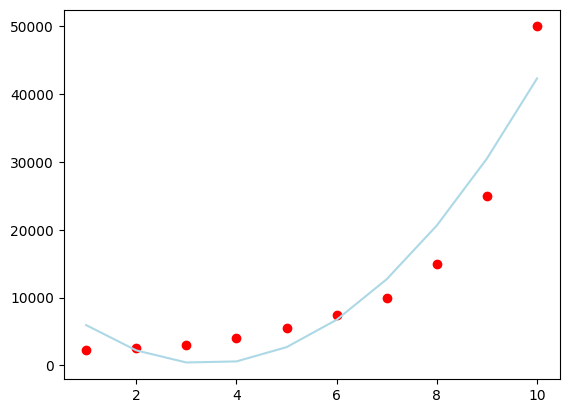

In [ ]:
#visualize linear regression
plt.scatter(X,y, color="red")
plt.plot(X, lin_reg2.predict(poly_reg.fit_transform(X)), color = "lightblue")
plt.show();

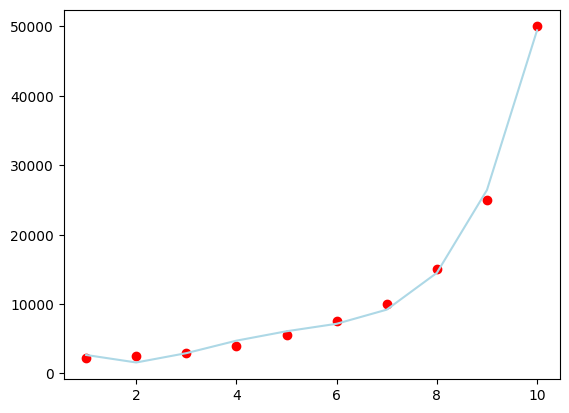

In [ ]:
###SADECE DEGREE 4'E ÇIKARILIYOR. Üstteki kodlarla aynı
#polynomial regression

from sklearn.preprocessing import PolynomialFeatures
#degree
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
X_poly
# x0 + x + x^2 şeklinde yazdırıldı..

# Polinom fonksiyonu öğrenmesi(katsayıları belirlemesi) için linear modele fit ettik.
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly, y)

#visualize linear regression
plt.scatter(X,y, color="red")
plt.plot(X, lin_reg2.predict(poly_reg.fit_transform(X)), color = "lightblue")
plt.show();

In [ ]:
# Lineer model
print(lin_reg.predict([[11]]))

[[34716.66666667]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
print(lin_reg.predict([[6.6]]))

[[16923.33333333]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
lin_reg2.predict(poly_reg.fit_transform([[6.6]]))

array([[8146.9948718]])

In [ ]:
lin_reg2.predict(poly_reg.fit_transform([[11]]))

array([[89041.66666669]])

### 4- Support Vector Regression

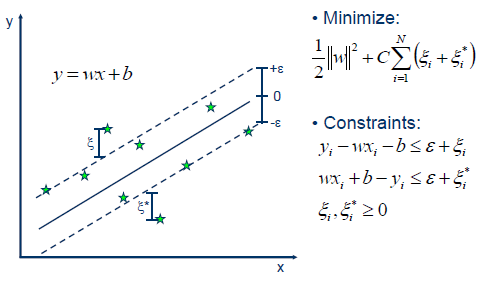

İlk olarak classification'da kullanılmıştır.

Amaç doğruyla margin değerini minimize etmektir.

Doğrusal olmak zorunda değildir.

Linear olabilir, polinomal olabilir, rbf(bir fonksiyon)
olabilir.

**En çok dikkat etmemiz gereken konu SVR marjinal(aykırı) verilere çok hassastır. Bu nedenle Scaler kullanılmak zorundadır.**

In [ ]:
# Verilen scale edilmesi(ölçeklenmesi)
from sklearn.preprocessing import StandardScaler

sc1 = StandardScaler()
X_scaled = sc1.fit_transform(X)
sc2 = StandardScaler()
y_scaled = sc2.fit_transform(y)

In [ ]:
from sklearn.svm import SVR
svr_reg = SVR(kernel = 'rbf')
svr_reg.fit(X_scaled, y_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

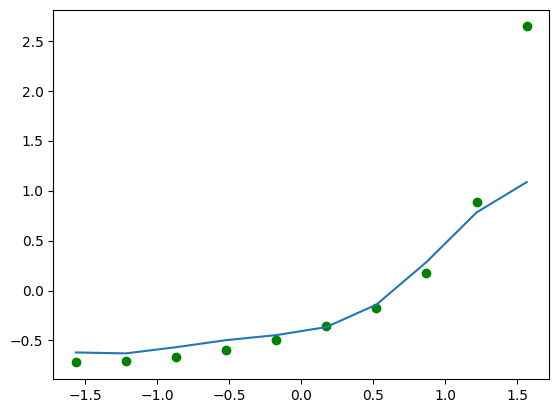

In [ ]:
plt.scatter(X_scaled, y_scaled, color="green")
plt.plot(X_scaled, svr_reg.predict(X_scaled));

In [ ]:


svr_reg.predict([[11]])

array([0.01150915])

In [ ]:
svr_reg.predict([[6.6]])

array([0.01150915])

### 5- Decision Tree(Karar Ağacı)

Genelde classification problemlerinde kullanılır. Fakat regressionda da kullanılır.

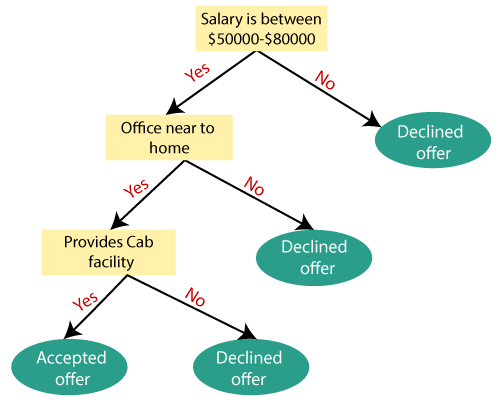



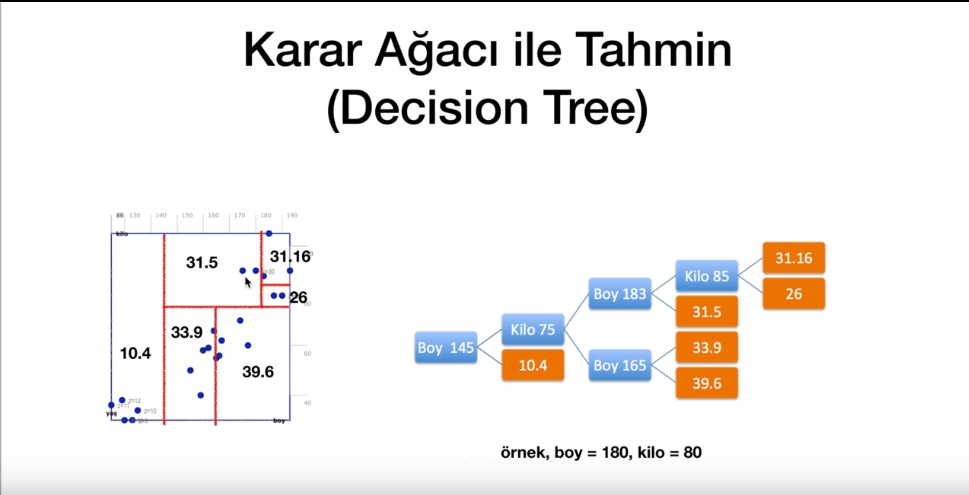

Örnekte yaş 31.5 bulunur.

In [ ]:
# 3.bölümden gelen değişkenler
X

Egitim Seviyesi
0                1
1                2
2                3
3                4
4                5
5                6
6                7
7                8
8                9
9               10

In [ ]:
y

maas
0   2250
1   2500
2   3000
3   4000
4   5500
5   7500
6  10000
7  15000
8  25000
9  50000

In [ ]:
# Decision tree'de scalera(ölçekleme) gerek yok.
from sklearn.tree import DecisionTreeRegressor
r_dt = DecisionTreeRegressor(random_state=0)
r_dt.fit(X ,y)

DecisionTreeRegressor(random_state=0)

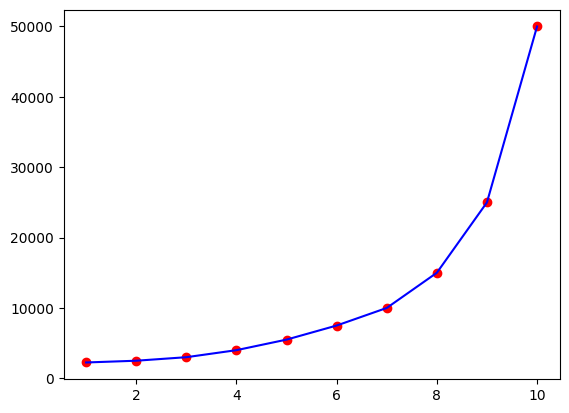

In [ ]:
plt.scatter(X,y, color="red")
plt.plot(X, r_dt.predict(X), color="blue")

In [ ]:
r_dt.predict([[11]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([50000.])

In [ ]:
r_dt.predict([[6.6]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([10000.])

### 6- Random Forest Regressor(Rassal Ağaç)

Decision Tree'yi farklı şekilde ele alır. Oldukça güçlüdür. Mantık birden fazla decision tree'nin çizilerek beraber kullanılmasıdır. Geniş decision tree daha küçük parçalar olarak ele alınır ve farklı sonuçlar oluşur.

Ensemble modeller..

Sınıflandırmada sonuçta çoğunluğa göre karar verilir.

Prediction'da ise ortalamalar alınır.

In [ ]:
# X ve y 3-'den geliyor.
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(random_state=0, n_estimators=10) #default estimator is 100.
rf_reg.fit(X.values, y.values.ravel())



RandomForestRegressor(n_estimators=10, random_state=0)

In [ ]:

rf_reg.predict([[6.6]])

array([10500.])

Decision Tree'de belirli bir aralık için (6.5-7.5) hep 10.000 döndürüyor fakat random forest 10.500 döndürdü.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


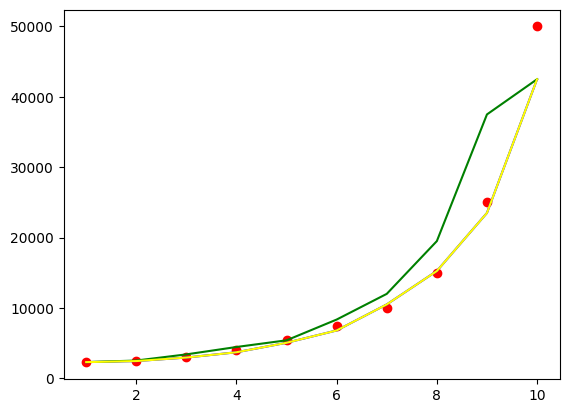

In [ ]:
plt.scatter(X,y, color="red")
plt.plot(X, rf_reg.predict(X), color="blue")
Z = X + 0.5
K = X - 0.4
plt.plot(X, rf_reg.predict(Z), color="green")
plt.plot(X, rf_reg.predict(K), color="yellow")

Random Forest görmediği verileri değerlendirmede çok başarılıdır. Decision Tree gördüklerini çok iyi öğrenir, görmediklerini tahmin edemez.

## Evaluation of Prediction Algorithms

### 1- R2 (R- Square) Yöntemi

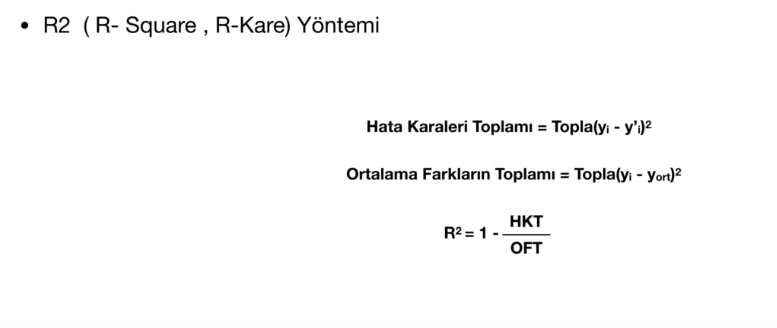

Kare alma amacımız negatifliği götürmek

Hata Karesi: Gerçekle tahmin arasındaki farkın karesi

Ortalama Fark : Tahminle gerçek değerlerin ortalamasının farkı

Baseline yani 0 değerinin anlamı, gerçek değerlerin ortalaması demektir. Çok basit bir mantıktır. Örneğin elimizde yaş verileri var, her x'e yaşların ortalaması cevabını veren model 0'dır.

### 2- Adjusted R2 (Düzeltilmis R2)

Eklenen değişken sisteme hiçbir zaman olumsuz etki yaratmadığından düzeltilmiş R2 ortaya çıkmıştır.

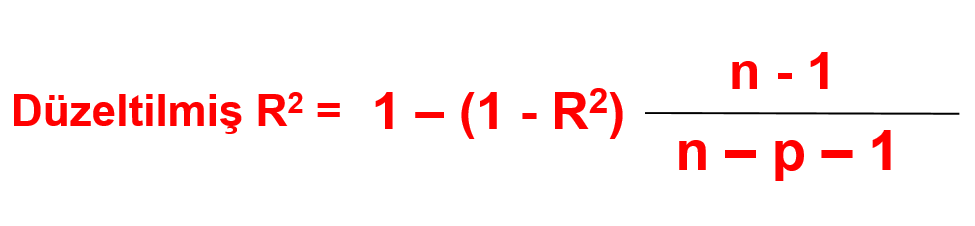

3-MAE,MSLE,MSE...

In [ ]:
from sklearn.metrics import r2_score
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
r2_score(y_true, y_pred)

0.9486081370449679

ÖDEV

1- Gerekli/ Gereksiz bağımsız değişkenleri bulunuz.(p-value)

2- 5 Farklı yönteme göre regresyon modellerini çıkarınız

3- Yöntemlerin başarıları karşılaştırın

4- 10 yıl tecrübeli ve 100puan almış bir CEO ve aynı özelliklere sahip bir müdürün maaşlarını 5yöntemle de tahmin edip sonuçları yorumlayınız.

In [ ]:
# ÖDEV


import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/data/bilkav.com_maaslar_yeni.csv")
df

Calisan ID             unvan  UnvanSeviyesi  Kidem  Puan   maas
0            1             Cayci              1      5    70   2250
1            2          Sekreter              2      5    70   2500
2            3  Uzman Yardimcisi              3      5    70   3000
3            4             Uzman              4      5    70   4000
4            5  Proje Yoneticisi              5      5    70   5500
5            6               Sef              6      5    70   7500
6            7             Mudur              7      5    70  10000
7            8          Direktor              8      5    70  15000
8            9           C-level              9      5    70  25000
9           10               CEO             10      5    70  50000
10          11             Cayci              1      7    99   2000
11          12          Sekreter              2      7     9   2500
12          13  Uzman Yardimcisi              3      7    62   4000
13          14             Uzman              4      4    38   3000
14          15  Proje Yoneticisi              5      1    80   5000
15          16               Sef              6      2    35   5000
16          17             Mudur              7      8    99  12000
17          18          Direktor              8      4    58  11000
18          19           C-level              9      2    20  15000
19          20               CEO             10      4    42  22000
20          21             Cayci              1      8    11   2200
21          22          Sekreter              2      2    53   2200
22          23  Uzman Yardimcisi              3      8    50   2800
23          24             Uzman              4      9    91   6000
24          25  Proje Yoneticisi              5      9    71   5400
25          26               Sef              6      1     2   4000
26          27             Mudur              7     10    81  12000
27          28          Direktor              8     10    38  10000
28          29           C-level              9      1    50  15000
29          30               CEO             10      9    83  60000

In [ ]:
df = df.drop("Calisan ID", axis=1)
df = df.drop("unvan", axis=1)
df

UnvanSeviyesi  Kidem  Puan   maas
0               1      5    70   2250
1               2      5    70   2500
2               3      5    70   3000
3               4      5    70   4000
4               5      5    70   5500
5               6      5    70   7500
6               7      5    70  10000
7               8      5    70  15000
8               9      5    70  25000
9              10      5    70  50000
10              1      7    99   2000
11              2      7     9   2500
12              3      7    62   4000
13              4      4    38   3000
14              5      1    80   5000
15              6      2    35   5000
16              7      8    99  12000
17              8      4    58  11000
18              9      2    20  15000
19             10      4    42  22000
20              1      8    11   2200
21              2      2    53   2200
22              3      8    50   2800
23              4      9    91   6000
24              5      9    71   5400
25              6      1     2   4000
26              7     10    81  12000
27              8     10    38  10000
28              9      1    50  15000
29             10      9    83  60000

In [ ]:
# p-value hesaplama Linear

X = df.drop("maas", axis=1)
y= df[["maas"]]

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

import statsmodels.api as sm
model = sm.OLS(lin_reg.predict(X),X)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.903
Model:                            OLS   Adj. R-squared (uncentered):              0.892
Method:                 Least Squares   F-statistic:                              83.89
Date:                Thu, 03 Aug 2023   Prob (F-statistic):                    8.38e-14
Time:                        09:33:28   Log-Likelihood:                         -295.74
No. Observations:                  30   AIC:                                      597.5
Df Residuals:                      27   BIC:                                      601.7
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [ ]:
# Kidem'in pvaluesu 0.5'den yüksek bu nedenle kaldırılmalı.
X = df.drop(["maas","Kidem"],axis=1)
y = df[["maas"]]

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

import statsmodels.api as sm
model = sm.OLS(lin_reg.predict(X),X)
print(model.fit().summary())


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.922
Model:                            OLS   Adj. R-squared (uncentered):              0.917
Method:                 Least Squares   F-statistic:                              166.0
Date:                Thu, 03 Aug 2023   Prob (F-statistic):                    2.95e-16
Time:                        09:36:20   Log-Likelihood:                         -292.12
No. Observations:                  30   AIC:                                      588.2
Df Residuals:                      28   BIC:                                      591.1
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

**R2'de %2lik bir büyüme var.**

Genel mantık yukarıdakiyle aynı her model için OLS hesaplanacak. p-value'lar her model için değişebiliyor. Tek parametreli(Unvan) linearda en yüksek çıkıyor.

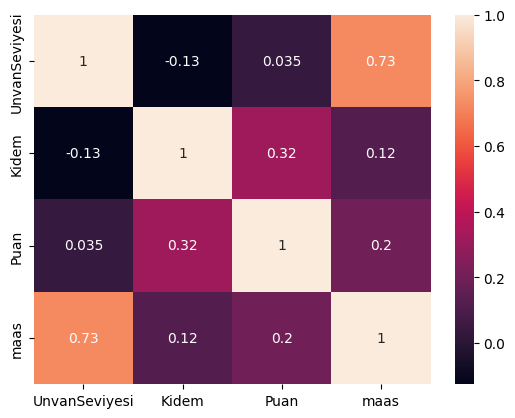

In [ ]:
# Visualize correlation matrix
import seaborn as sn
import matplotlib.pyplot as plt

corr_matrix = df.corr()

sn.heatmap(corr_matrix, annot=True)
plt.show()

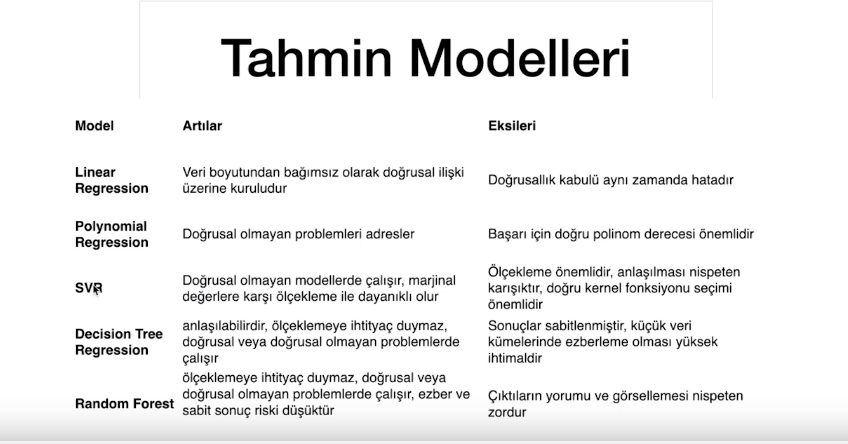

## Classification Algorithms

### 1-Logistic Regression

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/data/veriler.csv")
df

ulke  boy  kilo  yas cinsiyet
0    tr  130    30   10        e
1    tr  125    36   11        e
2    tr  135    34   10        k
3    tr  133    30    9        k
4    tr  129    38   12        e
5    tr  180    90   30        e
6    tr  190    80   25        e
7    tr  175    90   35        e
8    tr  177    60   22        k
9    us  185   105   33        e
10   us  165    55   27        k
11   us  155    50   44        k
12   us  160    58   39        k
13   us  162    59   41        k
14   us  167    62   55        k
15   fr  174    70   47        e
16   fr  193    90   23        e
17   fr  187    80   27        e
18   fr  183    88   28        e
19   fr  159    40   29        k
20   fr  164    66   32        k
21   fr  166    56   42        k

In [ ]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, 1:4]
y = df[["cinsiyet"]]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=27)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train) # Öğren ve uygula
X_test = sc.transform(X_test) # Sadece uygula


from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(random_state = 27)
logr.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=27)

In [ ]:
y_preds = logr.predict(X_test)
y_preds

array(['e', 'e', 'k', 'k', 'k'], dtype=object)

In [ ]:
y_test

cinsiyet
18        e
9         e
12        k
11        k
0         e

> Confusion Matrix

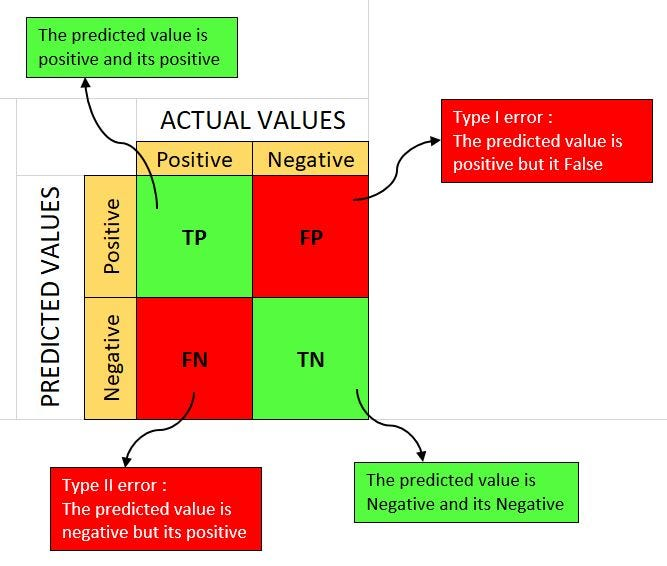

Predicted'a bakarak değerlendirildiğinde kolayca anlaşılabilir.

In [ ]:
# acc, precision, recal... bunlar eklenecek
# https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_preds)
cm

array([[2, 1],
       [0, 2]])

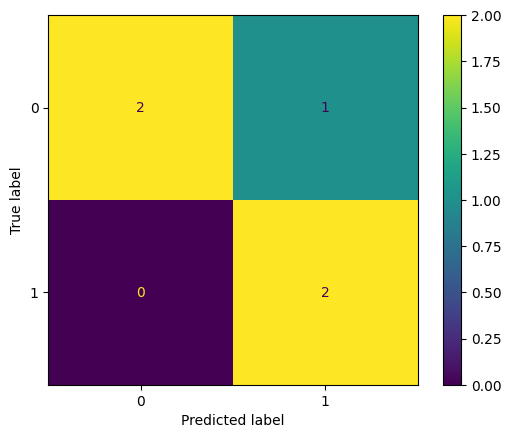

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

### 2-KNN (K NEAREST NEIGHBOR)

Mantık, en yakın 3 komşuya bakılır ve ona göre sınıflandırılır.(K değişebilir).
4 alınırsa ve 2ye 2 olursa mesafeye bakılır.

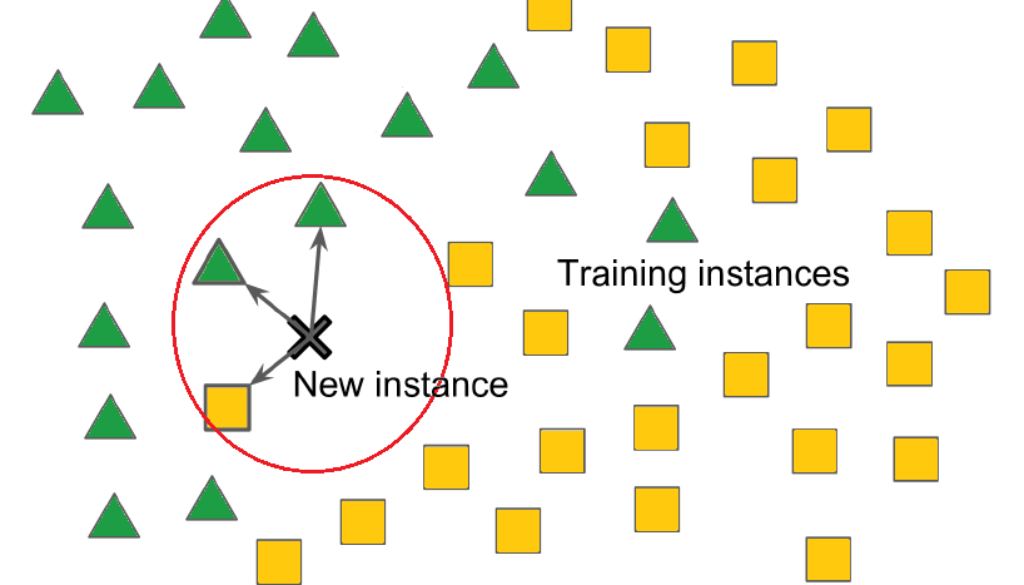

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, metric ="minkowski")
knn.fit(X_train, y_train)

y_preds = knn.predict(X_test)
y_preds

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array(['e', 'e', 'k', 'k', 'k'], dtype=object)

In [ ]:
y_test

cinsiyet
18        e
9         e
12        k
11        k
0         e

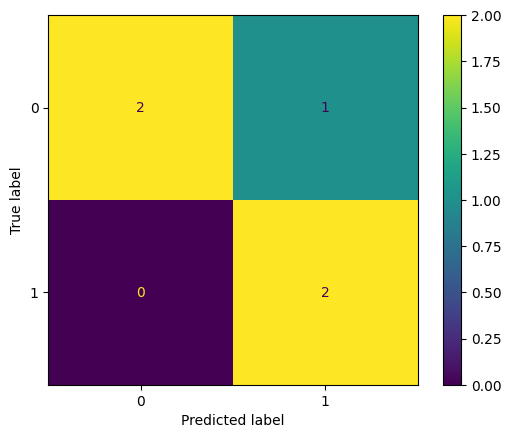

In [ ]:
cm = confusion_matrix(y_test, y_preds)
cm

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

Hoca neighbor'ı 1 yaptığında doğru tahmin artmıştı ama video yıllar öncesi..

### 3- Support Vector Classifier

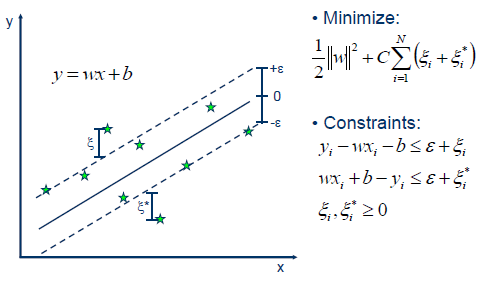

İlk olarak classification'da kullanılmıştır.

Amaç doğruyla margin değerini minimize etmektir.

Doğrusal olmak zorunda değildir.

Linear olabilir, polinomal olabilir, rbf(bir fonksiyon)
olabilir.

Standardizasyon önemlidir.!!!

In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel="linear")

svc.fit(X_train, y_train)
y_preds = svc.predict(X_test)
y_preds

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['e', 'e', 'k', 'k', 'k'], dtype=object)

In [ ]:
y_test

cinsiyet
18        e
9         e
12        k
11        k
0         e

> SVM Çekirdek Hilesi (kernel trick)

In [ ]:
# Boyut yükselterek sınıflandırma yapmaya yarar.
# Doğrusal olarak ayrıştırılamayanları ayrıştırmaya yararş
#Detay için google

### 4- Naive Bayes(Naif Bayes)

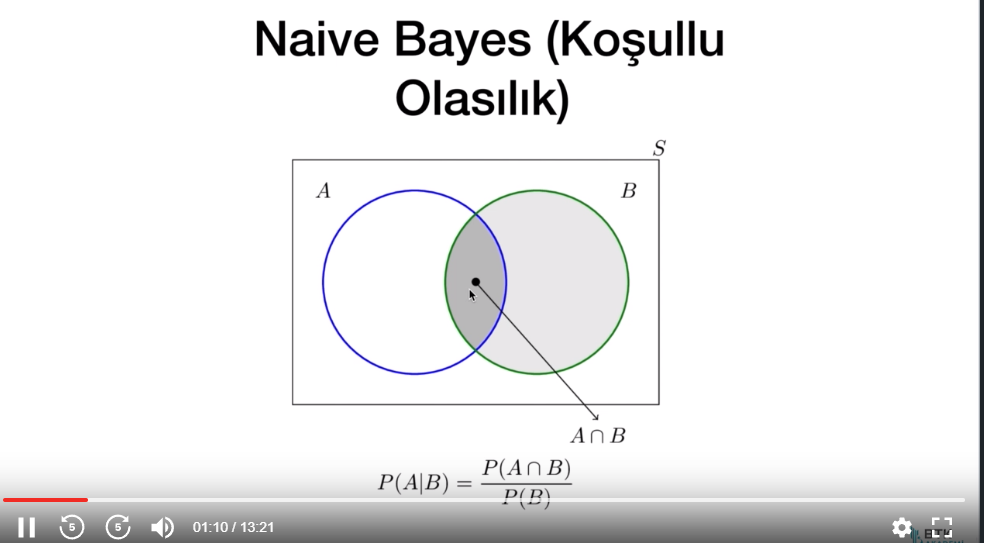

B gerçekleşecek sonra A gerçekleşecek

Dengesiz veri kümelerinde çalışabilir.

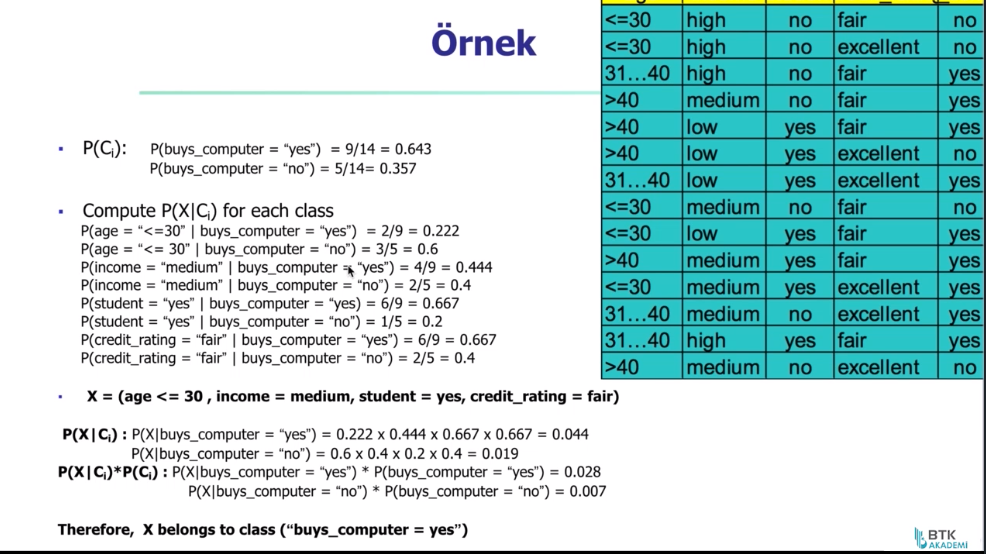

Big data'da lazy learning daha çok terchi edilir.
Eager learning daha maliyetlidir.

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train, y_train)
y_preds = gnb.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_preds, y_test

(array(['e', 'e', 'k', 'k', 'k'], dtype='<U1'),
    cinsiyet
 18        e
 9         e
 12        k
 11        k
 0         e)

### 5- Decision Tree Classificaton

In [ ]:
 #Btk-Akademide şadi hoca çok güzel bir şekilde açıklıyor.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion = "entropy")
dtc.fit(X_train, y_train)
y_preds = dtc.predict(X_test)
y_preds

array(['e', 'e', 'k', 'k', 'e'], dtype=object)

In [ ]:
y_test

cinsiyet
18        e
9         e
12        k
11        k
0         e

Şu ana kadar 0 indexliyi doğru bilen tek algoritma.

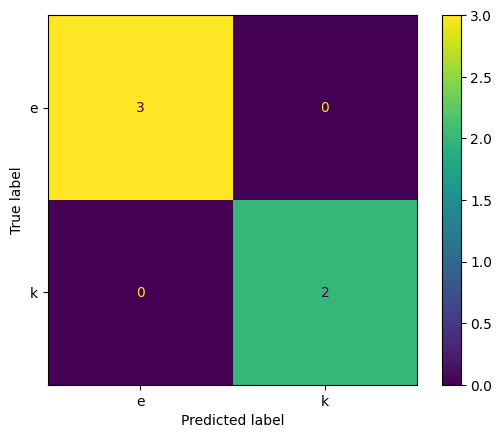

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_preds, labels=dtc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=dtc.classes_)
disp.plot()



### 6- Random Forest Classifier(Rassal Orman)

Decision Tree'lerin kullanıldığı bir ensemble modeldir.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

<ipython-input-20-9ae78a76c7c3>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


0.8

In [ ]:
y_preds = rfc.predict(X_test)
y_preds,y_test

(array(['e', 'e', 'k', 'k', 'k'], dtype=object),
    cinsiyet
 18        e
 9         e
 12        k
 11        k
 0         e)

## Evaluation of Classifier Algorithms & more

> Confusion Matrix

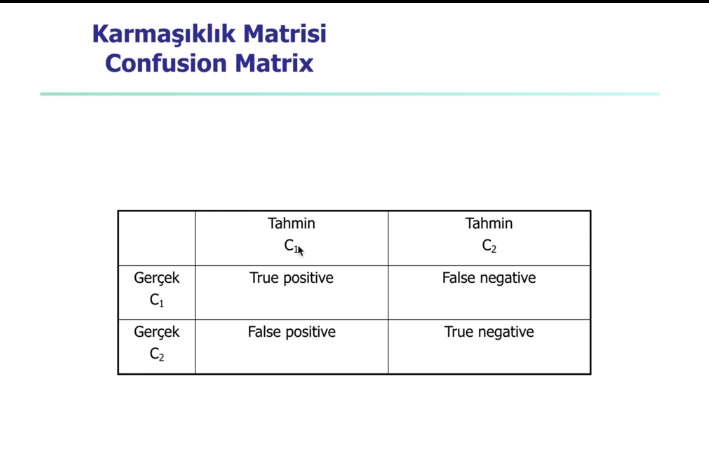

Gerçek C1 ve C2 nin dengesizliği yani verinin imbalanced olması kesinlikle incelenmelidir ve ona göre aksiyon alınmalıdır.

True Positive Rate(TPR), False Positive Rate(FPR),
Precision, Accuracy..

Prevelance veri dengesi için oldukça önemli 0.5 demek veri %100 dengeli demektir.

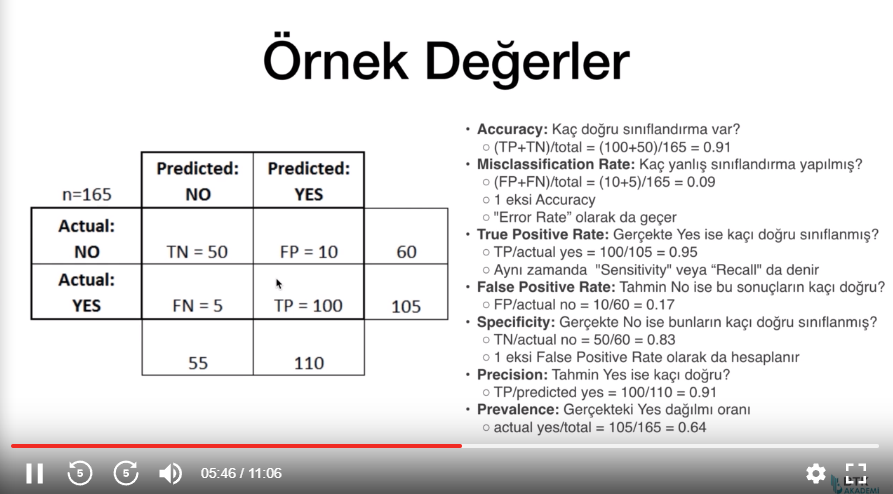

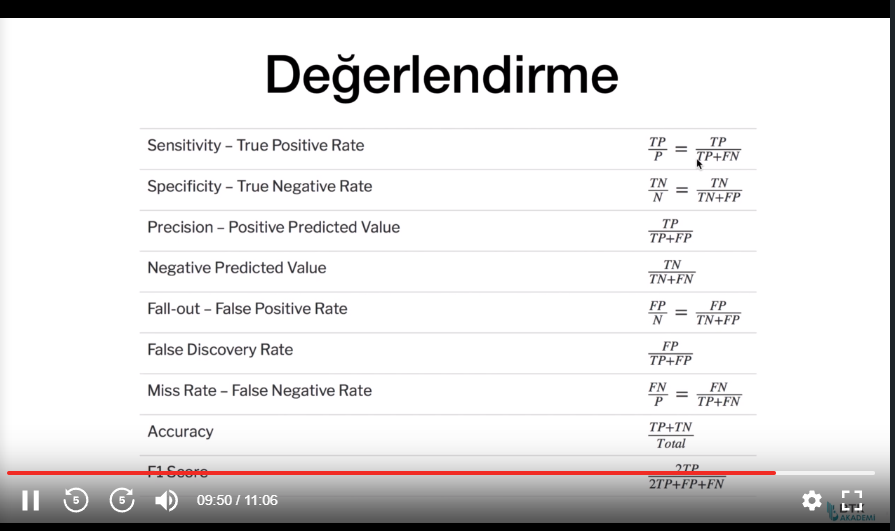

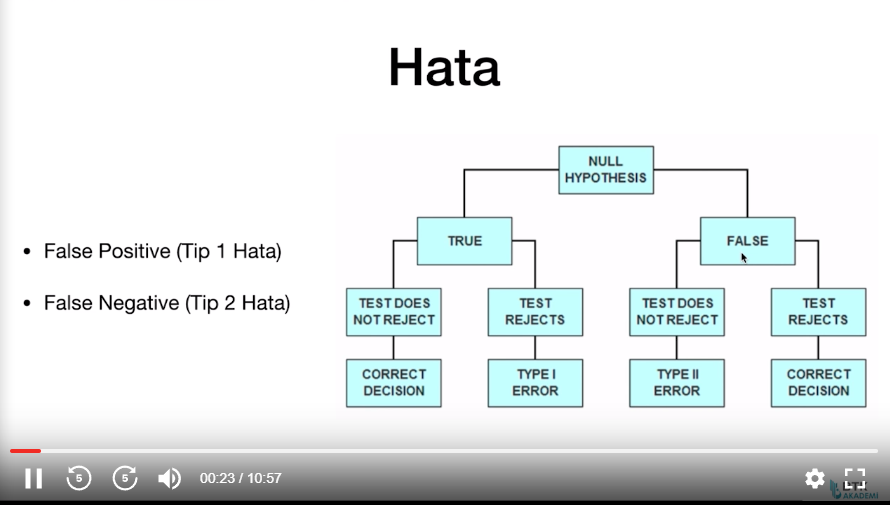

> Accuracy Paradox (Doğruluk Paradoksu)

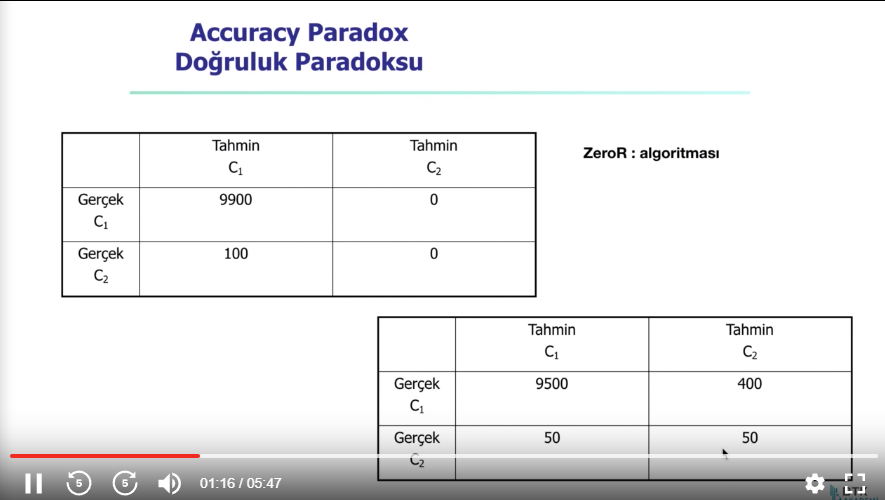

Hangi sınıftan daha çok örnek geldiyse onu sınıflandırma sonucu olarak kullan. Yani herkese C1 diyelim..

Accuracy'e baktığımızda oran daha yüksek fakat makine gerçekte hiçbir şey öğrenmiyor demektir.

Dolayısıyla sadece accuracy değerlendirme kriteri değildir.

### Roc Curve & AUC Curve Acc etc.

Kod konusunda yetersiz, eklemeler yapılacak.

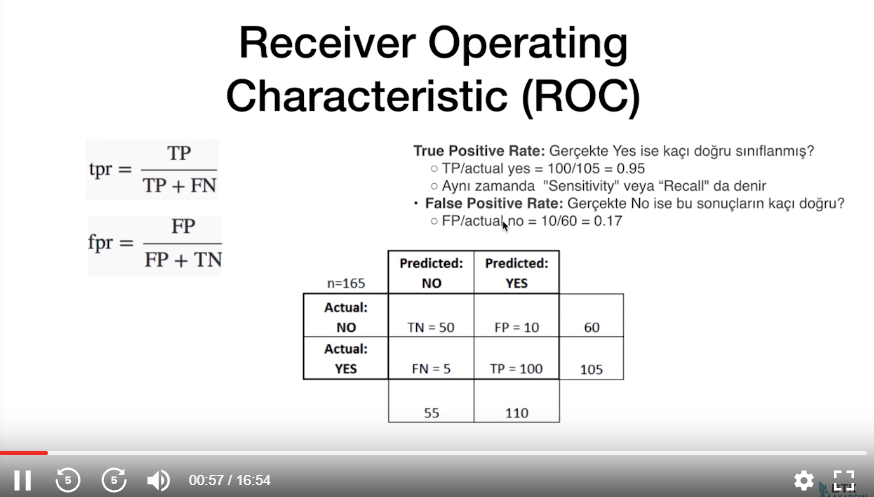

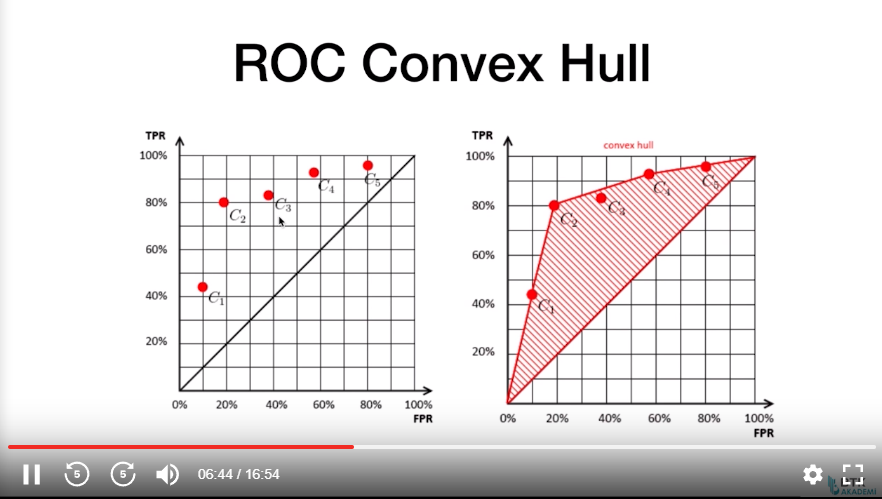

C1 ,C2, C3, C4 farklı algoritmaları temsil ediyor. Eğik çizginin üstünde olması istenen bir durumdur.

Bu alanın içinde kalan algoritma diğerlerine göre kullanışsızdır. Örneğin TPR artsın fpr da artabilir ama dersek C4 var, TPR artsın ama FPR çok da artmasın dersek de C2 daha iyi..

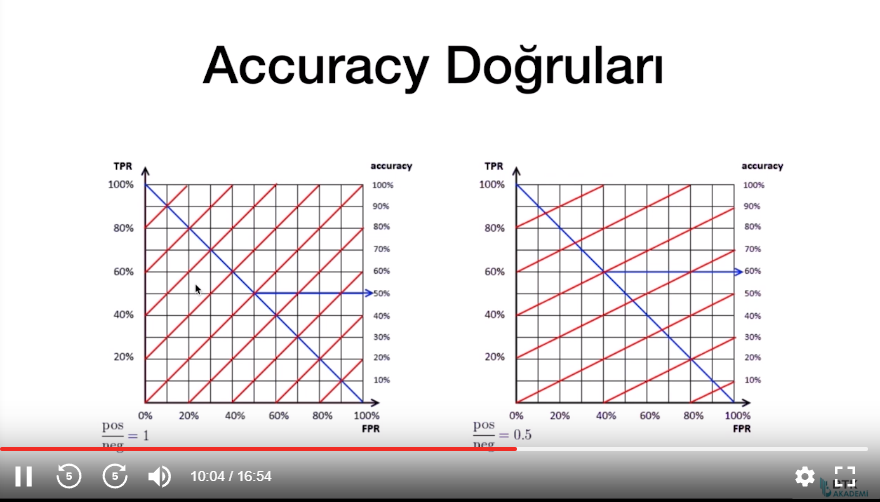

Hangi algoritmayı seçeceğimiz önemli bir sorudur.

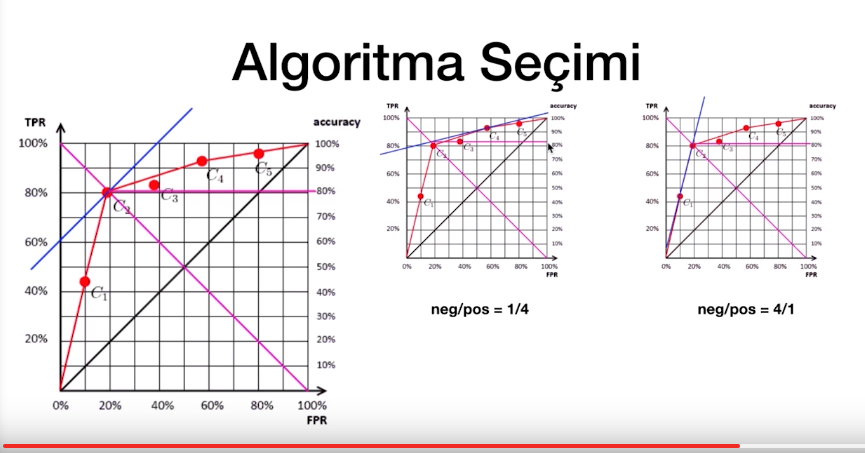

neg/pos oranı 1ken 45derece accuracy doğrusu çekilir.
ÖRneğin c4 için de paralel çizgi çekip diyagonalde düştüğü yere bakılırsa yaklaşık %70 acc var diyebiliriz.
Neg/pos 6/1 olsaydı en iyi algoritma C1'di.

In [ ]:
# Bir değerin sınıflandırmadaki olasılıkları
#%51 ile sınıflandırsa çok da güvenilir olmayabilirdi.
y_proba = rfc.predict_proba(X_test)
y_proba

array([[0.95, 0.05],
       [0.94, 0.06],
       [0.01, 0.99],
       [0.01, 0.99],
       [0.39, 0.61]])

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thold = roc_curve(y_test, y_proba[:,0], pos_label="e")

fpr, tpr, thold

(array([0., 0., 0., 1.]),
 array([0.        , 0.33333333, 1.        , 1.        ]),
 array([1.95, 0.95, 0.39, 0.01]))

In [ ]:
# Ödev İris Veri Kümesi

df = pd.read_excel("/content/drive/MyDrive/data/Iris.xls")
df

sepal length  sepal width  petal length  petal width            iris
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]

import numpy as np
from google.colab import autoviz
df_5229132325377024983 = autoviz.get_df('df_5229132325377024983')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5229132325377024983, *['sepal length'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7396752783977280366 = autoviz.get_df('df_7396752783977280366')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7396752783977280366, *['sepal width'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7485195366661644251 = autoviz.get_df('df_7485195366661644251')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7485195366661644251, *['petal length'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8027369706562718517 = autoviz.get_df('df_8027369706562718517')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_8027369706562718517, *['petal width'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7136734026673808823 = autoviz.get_df('df_7136734026673808823')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7136734026673808823, *['sepal length'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4999779397313567166 = autoviz.get_df('df_4999779397313567166')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4999779397313567166, *['sepal width'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1233281870526714624 = autoviz.get_df('df_1233281870526714624')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_1233281870526714624, *['petal length'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4657713992365646890 = autoviz.get_df('df_4657713992365646890')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4657713992365646890, *['petal width'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8613202176976712058 = autoviz.get_df('df_8613202176976712058')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_8613202176976712058, *['iris'], **{})
chart

import numpy as np
from google.colab import autoviz
df_317241108211570755 = autoviz.get_df('df_317241108211570755')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_317241108211570755, *[[['sepal length', 'sepal width'], ['sepal width', 'petal length'], ['petal length', 'petal width']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_7577627254993942159 = autoviz.get_df('df_7577627254993942159')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_7577627254993942159, *['sepal length', 'iris'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_8869718015874190155 = autoviz.get_df('df_8869718015874190155')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_8869718015874190155, *['sepal width', 'iris'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_3820558164620211638 = autoviz.get_df('df_3820558164620211638')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_3820558164620211638, *['petal length', 'iris'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_820708886046542153 = autoviz.get_df('df_820708886046542153')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_820708886046542153, *['petal width', 'iris'], **{'inner': 'stick'})
chart

In [ ]:
import numpy as np
from google.colab import autoviz
df_8613202176976712058 = autoviz.get_df('df_8613202176976712058')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_8613202176976712058, *['iris'], **{})
chart

Veriler dengeli.

In [ ]:
df["iris"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
df.describe()

sepal length  sepal width  petal length  petal width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

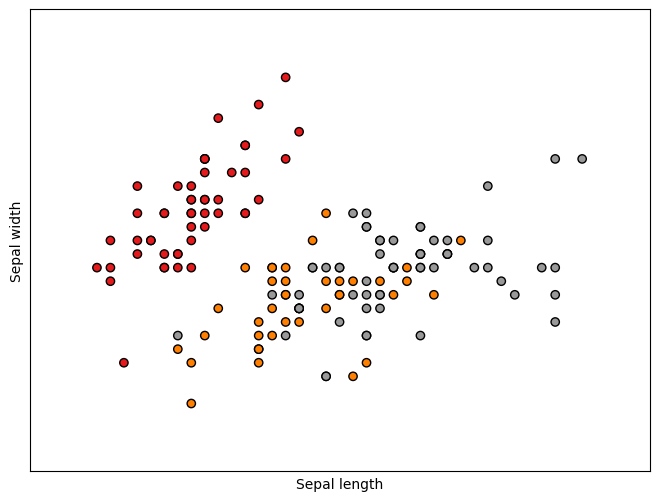

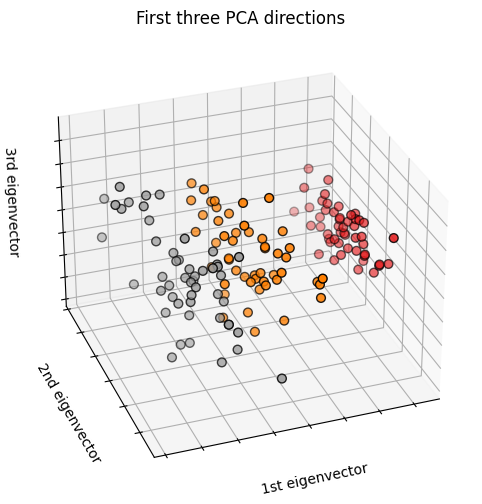

In [ ]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()

In [ ]:
df

sepal length  sepal width  petal length  petal width            iris
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

X = df.drop("iris",axis=1)
y = df["iris"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                      y,
                                       test_size=0.2,
                                       random_state=27)



knn = KNeighborsClassifier(n_neighbors=5, metric ="minkowski")
knn.fit(X_train, y_train)

y_preds = knn.predict(X_test)
y_preds

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica'], dtype=object)

In [ ]:
knn.score(X_test, y_test)

0.9666666666666667

## Clustering (Kümeleme / Bölütleme)

Classificationdan farklarından biri de unsupervised learning olmasıdır.

###1-  K-Means



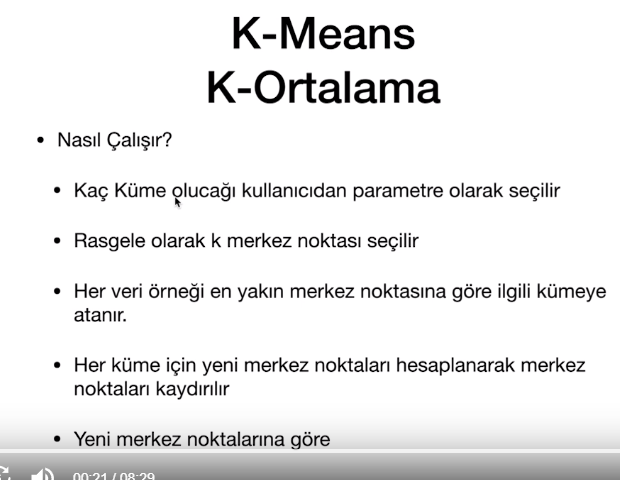

Alternatifi X-Means

> K-Means Başlangıç Noktası Tuzağı

Tamamen rastgele başlanan data pointler hataya sebep olabilir. Çözüm K-Means+++ algoritması

> Bölüt Sayısına Karar Vermek

WCSS değerine bakarak karar verilebilir.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/data/bilkav.com_musteriler.csv")
df

No Cinsiyet  Yas  Hacim  Maas
0      1        K   60  69900  6325
1      2        K   30  79000  5200
2      3        E   52  85500  7825
3      4        E   57  17100  8375
4      5        E   55   5500  5450
..   ...      ...  ...    ...   ...
195  196        E   22  96600  7900
196  197        E   39  83700  7675
197  198        K   25  34000  4000
198  199        K   30  42000  5500
199  200        K   23  47600  4150

[200 rows x 5 columns]

In [ ]:
X = df.iloc[:, 3:]
X

Hacim  Maas
0    69900  6325
1    79000  5200
2    85500  7825
3    17100  8375
4     5500  5450
..     ...   ...
195  96600  7900
196  83700  7675
197  34000  4000
198  42000  5500
199  47600  4150

[200 rows x 2 columns]

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=27)
kmeans.fit(X)

print(kmeans.cluster_centers_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[ 59182.08955224   5878.35820896]
 [ 22495.40229885   5307.18390805]
 [104386.95652174   7289.13043478]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

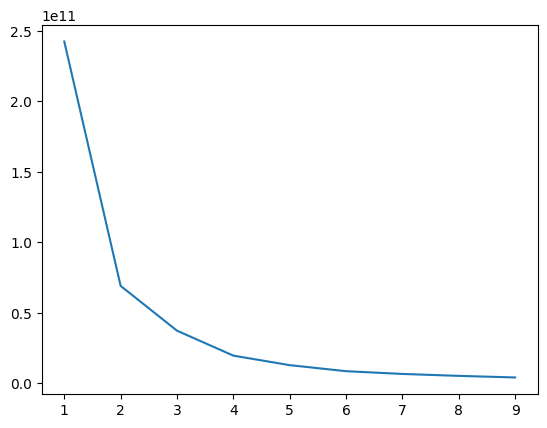

In [ ]:
#WCSS
sonuclar = []
for i in range(1,10):
  kmeans = KMeans(n_clusters = i, init='k-means++', random_state=27)
  kmeans.fit(X)
  sonuclar.append(kmeans.inertia_)

plt.plot(range(1,10), sonuclar)

### 2- Hiyerarşik Kümeleme

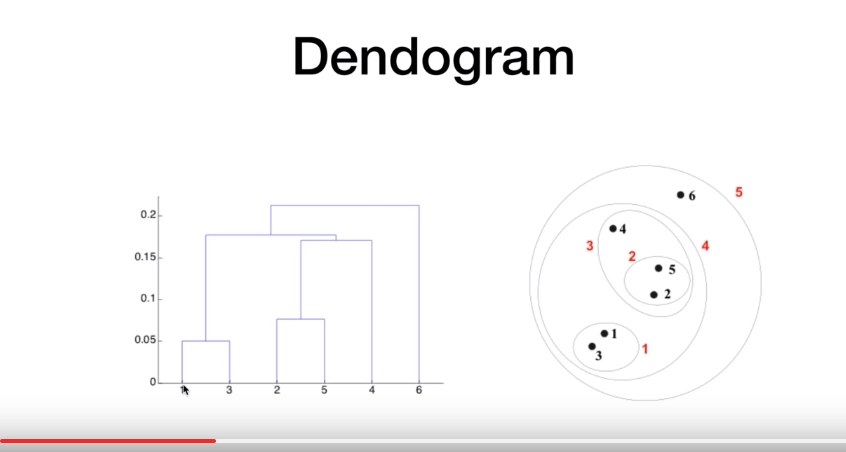

y ekseni uzaklığı temsil etmektedir. Uzaklık arttırılarak noktalar birleştirilir.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")

y_predict = ac.fit_predict(X)
y_predict

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 0, 2, 2, 2, 2, 0, 2, 1, 1, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2,
       0, 1, 0, 1, 2, 0, 2, 1, 2, 1, 1, 0, 1, 1, 1, 2, 1, 0, 0, 2, 0, 2,
       2, 1, 1, 1, 1, 0, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 2, 1, 2,
       1, 0, 1, 2, 0, 0, 0, 0, 2, 2, 0, 0, 1, 2, 2, 2, 1, 1, 0, 0, 0, 1,
       2, 2, 0, 2, 0, 1, 2, 1, 2, 0, 2, 2, 1, 0, 0, 2, 2, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 2, 0, 1, 1, 2, 1, 0, 0, 0, 1, 2, 2, 0, 2, 2, 1,
       1, 1, 1, 2, 1, 1, 0, 1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 0, 2,
       1, 0, 2, 1, 0, 2, 1, 1, 2, 1, 2, 1, 1, 0, 2, 2, 0, 2, 2, 1, 1, 2,
       2, 1, 0, 1, 1, 0, 1, 0, 0, 0, 2, 2, 1, 2, 1, 2, 1, 0, 2, 0, 0, 1,
       1, 1])

In [ ]:
plt.scatter(X[y_predict==0,0], X[y_predict==0, 1],s=100, c="red")


InvalidIndexError: ignored

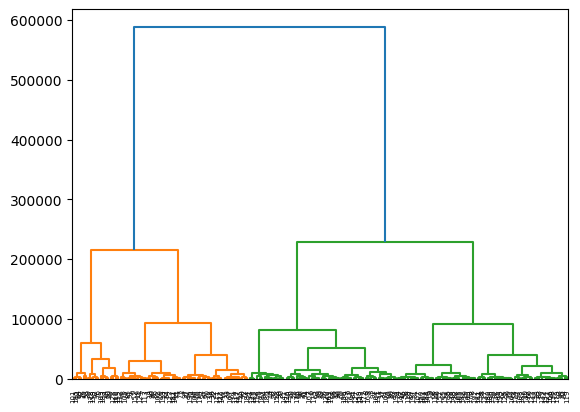

In [ ]:
import scipy.cluster.hierarchy as sch

dendogram = sch.dendrogram(sch.linkage(X, method="ward"))
plt.show()

## Birliktelik Kural Çıkarımı (Association Rule Mining)

Bunu alanlar bunu da aldı, bunu izleyenler bunu da izledi....

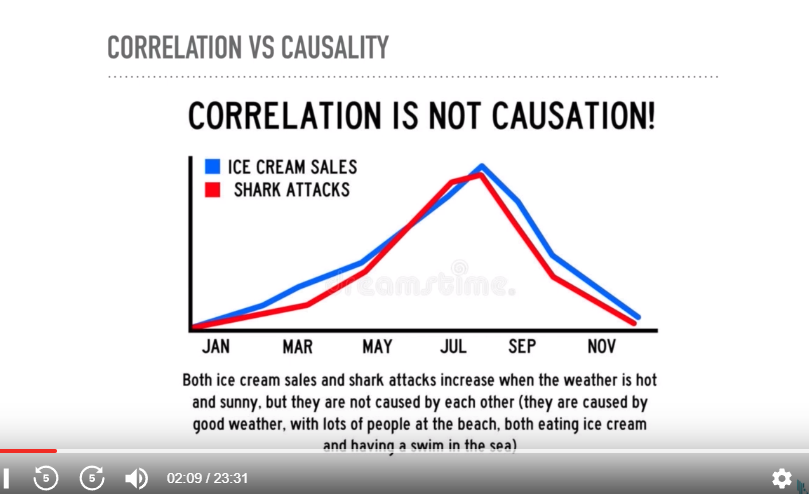

### APriori Algoritması

ARM & ARL

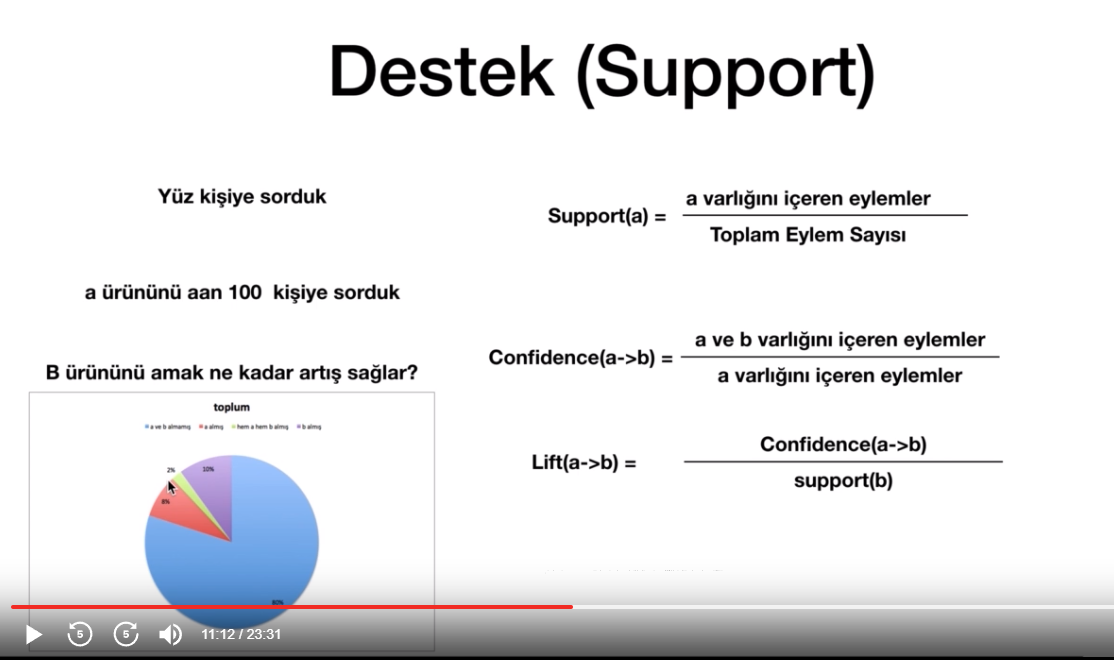

In [ ]:
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5956 sha256=33f8b593fe0a5091c68d000f4d6af33427108b3ffcba1df02fff69b7be1a281a
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/data/bilkav.com_sepet.csv")
df

shrimp            almonds      avocado    vegetables mix  \
0            burgers          meatballs         eggs               NaN   
1            chutney                NaN          NaN               NaN   
2             turkey            avocado          NaN               NaN   
3      mineral water               milk   energy bar  whole wheat rice   
4     low fat yogurt                NaN          NaN               NaN   
...              ...                ...          ...               ...   
7495          butter         light mayo  fresh bread               NaN   
7496         burgers  frozen vegetables         eggs      french fries   
7497         chicken                NaN          NaN               NaN   
7498        escalope          green tea          NaN               NaN   
7499            eggs    frozen smoothie  yogurt cake    low fat yogurt   

     green grapes whole weat flour yams cottage cheese energy drink  \
0             NaN              NaN  NaN            NaN          NaN   
1             NaN              NaN  NaN            NaN          NaN   
2             NaN              NaN  NaN            NaN          NaN   
3       green tea              NaN  NaN            NaN          NaN   
4             NaN              NaN  NaN            NaN          NaN   
...           ...              ...  ...            ...          ...   
7495          NaN              NaN  NaN            NaN          NaN   
7496    magazines        green tea  NaN            NaN          NaN   
7497          NaN              NaN  NaN            NaN          NaN   
7498          NaN              NaN  NaN            NaN          NaN   
7499          NaN              NaN  NaN            NaN          NaN   

     tomato juice low fat yogurt green tea honey salad mineral water salmon  \
0             NaN            NaN       NaN   NaN   NaN           NaN    NaN   
1             NaN            NaN       NaN   NaN   NaN           NaN    NaN   
2             NaN            NaN       NaN   NaN   NaN           NaN    NaN   
3             NaN            NaN       NaN   NaN   NaN           NaN    NaN   
4             NaN            NaN       NaN   NaN   NaN           NaN    NaN   
...           ...            ...       ...   ...   ...           ...    ...   
7495          NaN            NaN       NaN   NaN   NaN           NaN    NaN   
7496          NaN            NaN       NaN   NaN   NaN           NaN    NaN   
7497          NaN            NaN       NaN   NaN   NaN           NaN    NaN   
7498          NaN            NaN       NaN   NaN   NaN           NaN    NaN   
7499          NaN            NaN       NaN   NaN   NaN           NaN    NaN   

     antioxydant juice frozen smoothie spinach  olive oil  
0                  NaN             NaN     NaN        NaN  
1                  NaN             NaN     NaN        NaN  
2                  NaN             NaN     NaN        NaN  
3                  NaN             NaN     NaN        NaN  
4                  NaN             NaN     NaN        NaN  
...                ...             ...     ...        ...  
7495               NaN             NaN     NaN        NaN  
7496               NaN             NaN     NaN        NaN  
7497               NaN             NaN     NaN        NaN  
7498               NaN             NaN     NaN        NaN  
7499               NaN             NaN     NaN        NaN  

[7500 rows x 20 columns]

In [ ]:
from apyori import apriori
kurallar = apriori(df,min_support=0.01, min_confidence=0.2)

## Reinforced Learning

### 1- UCB Algorithm (upper Confidence Bound)

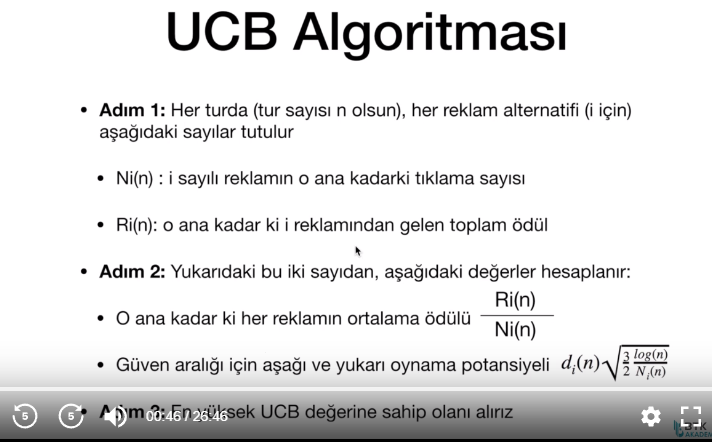

### 2- Thompson

## Natural Language Process(NLP) Doğal Dil İşleme

Bazı Doğal Dil İşleme Kaynakları:

NLTK : nltk.org

SpaCy : spacy.io

Stanford NLP

OpenNLP: Apache : opennlp.apache.org

Rapid Automatic Keyword Extraction (RAKE)

Amueller Word Cloud

Tensor Flow : Word2Vec

Türkçe Doğal Dil İşleme Kaynaklarından
bazıları

Zemberek  ( http://zembereknlp.blogspot.com )

İTÜ : http://tools.nlp.itu.edu.tr

Tspell ( http://tspell.sourceforge.net/hakkinda.html )

Yıldız Teknik Üniversitesi: Kemik ( http://www.kemik.yildiz.edu.tr )

Wordnet (Balkanet)

TrMorph ( http://coltekin.net/cagri/trmorph/ )

TSCorpus ( https://tscorpus.com )

Metu- Sabancı Tree Bank ve ITU Doğrulama Kümesi ( https://web.itu.edu.tr/gulsenc/treebanks.html )


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/data/bilkav.com_Restaurant_Reviews.csv", on_bad_lines='skip')
df.head()

Review  Liked
0                           Wow... Loved this place.    1.0
1                                 Crust is not good.    0.0
2          Not tasty and the texture was just nasty.    0.0
3  Stopped by during the late May bank holiday of...    1.0
4  The selection on the menu was great and so wer...    1.0

> Noktalama işaretlerinden kurtulma(get rid of punctuation marks)

In [ ]:
df = df.dropna()
df = df.reset_index(drop=True)
df.isna().sum()

Review    0
Liked     0
dtype: int64

In [ ]:
import re

yorum = re.sub("[^a-zA-Z]"," ",df["Review"][6])
yorum

'Honeslty it didn t taste THAT fresh  '

> Büyük küçük harfleri düzeltme

In [ ]:
yorum = yorum.lower()
yorum

'honeslty it didn t taste that fresh  '

> Cümleyi kelimeler listesine çevirme

In [ ]:
yorum = yorum.split()
yorum

['honeslty', 'it', 'didn', 't', 'taste', 'that', 'fresh']

> StopWords - anlam ifade etmeyen kelimeler-

In [ ]:
import nltk

In [ ]:
durma = nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
durma

True

> Kelimeleri Gövdelerine Ayırma(stemmer)

Recommended kökü recommend, highly kökü high gibi..

In [ ]:
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

In [ ]:
from nltk.corpus import stopwords

In [ ]:
yorum = [ps.stem(kelime) for kelime in yorum if not kelime in set(stopwords.words('english')) ]
yorum

['honeslti', 'tast', 'fresh']

In [ ]:
yorum = ' '.join(yorum)
yorum

'honeslti tast fresh'

In [ ]:
uzunluk = len(df)
uzunluk

704

In [ ]:
# Döngü halinde her yoruma bu işlemleri yapalım

uzunluk = len(df)
derlem = []
for i in range(uzunluk):
  yorum = re.sub("[^a-zA-Z]"," ",df["Review"][i])
  yorum = yorum.lower()
  yorum = yorum.split()
  yorum = [ps.stem(kelime) for kelime in yorum if not kelime in set(stopwords.words('english')) ]
  yorum = ' '.join(yorum)
  derlem.append(yorum)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2000)

X = cv.fit_transform(derlem).toarray()


In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Bir sparse matrix oluşturduk. (yani çoğunluğu boş)

Bag of Words(BOW)

In [ ]:
y = df.iloc[:, 1].values
y

array([1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
       1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1.,
       1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0.,
       1., 0., 1., 1., 1.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = gnb.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[35, 42],
       [ 8, 56]])

## Deep Learning

In [ ]:
# ANN Artificial Neural Network


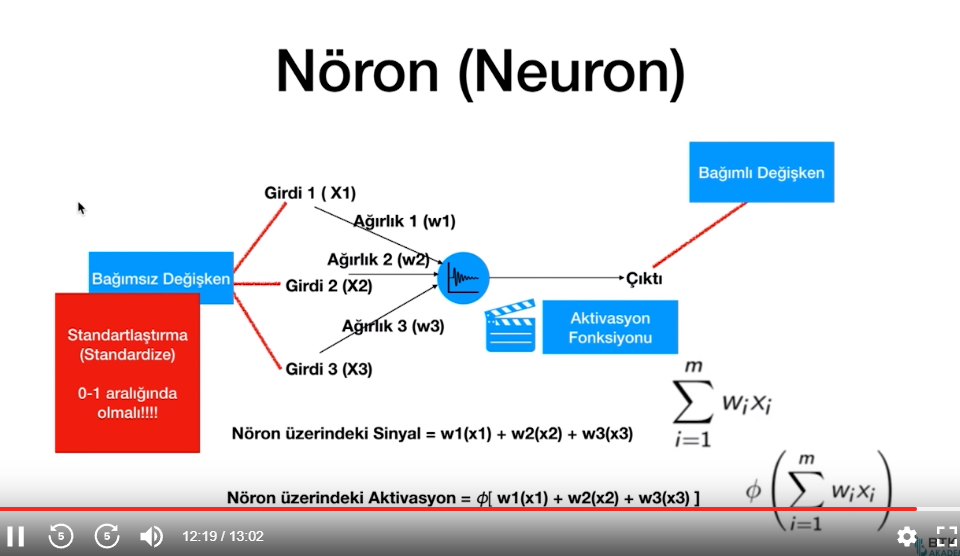

Girdiden mavi yuvarlağa giden kısımda Ağırlık da var. Yani sinapsislerde ağırlıklar var.

In [ ]:
# Aktivasyon Fonksiyonları

Aslında tüm fonksiyonlar aktivasyon fonksiyonu olarak kullanılabilir. Ancak bazı fonksiyonlar belirli avantajları sebebiyle tercih edilir.

> Step Function (Adım Fonksiyonu) Eşik Fonksiyonu Threshold Fonksiyonu adlandırmalarına sahip

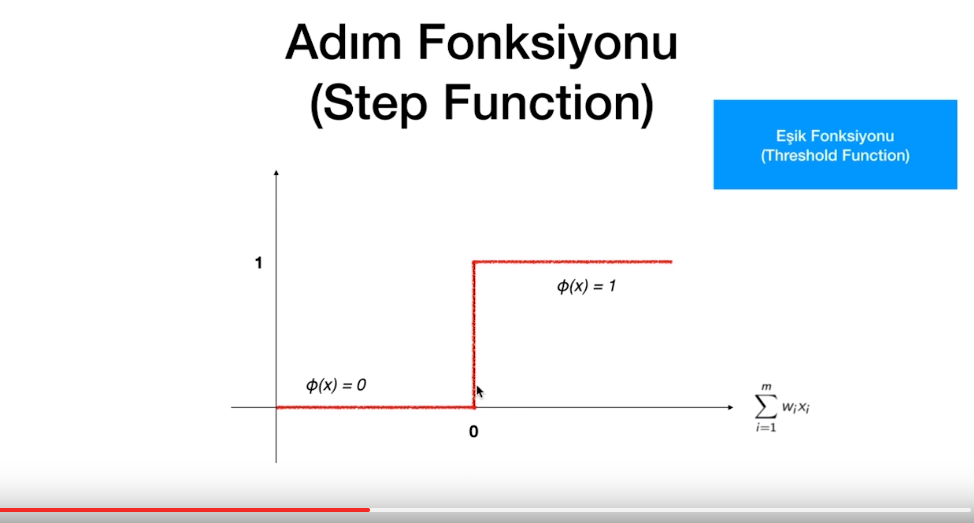

> S Fonksiyonu(Sigmoid Function)

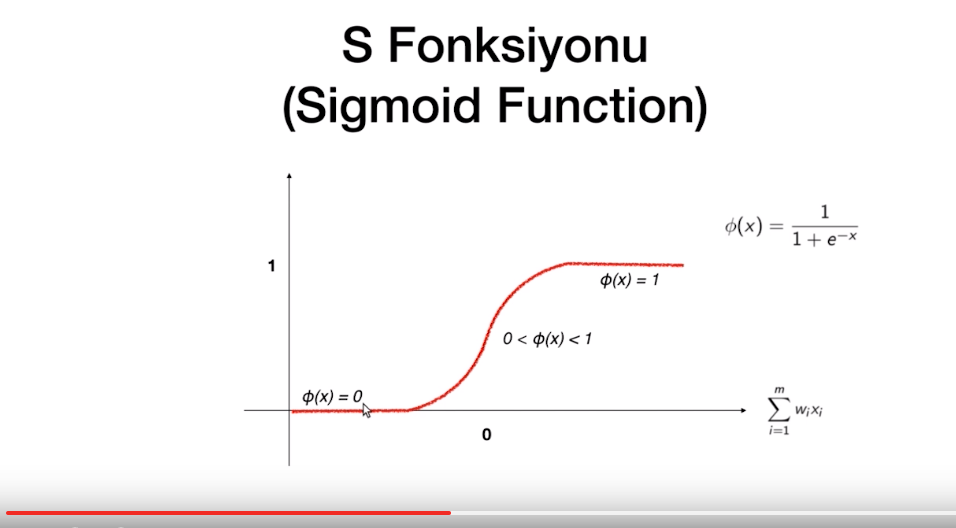

> Düzleştirilmiş Fonksiyon (Rectifier)

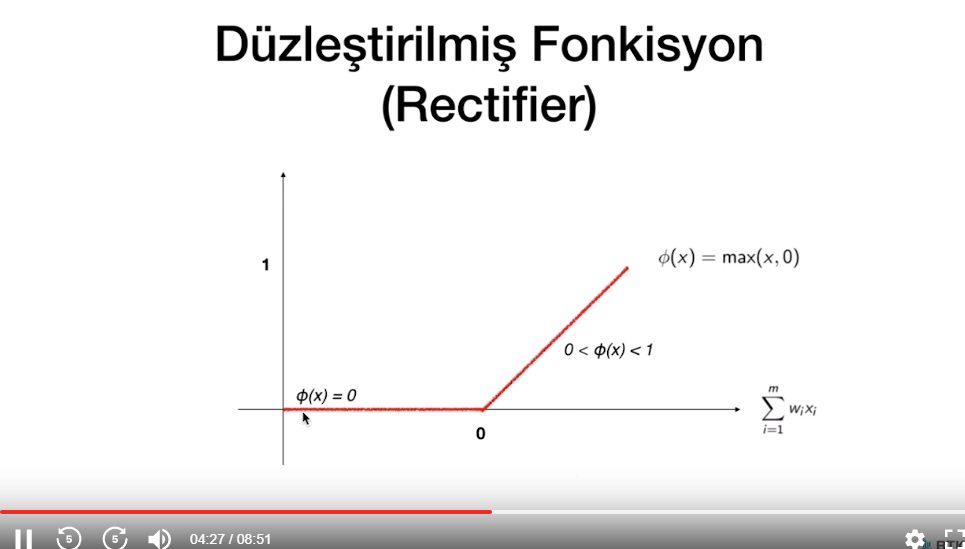

> Hyperbolic Tangent Hiperbolik Tanjant

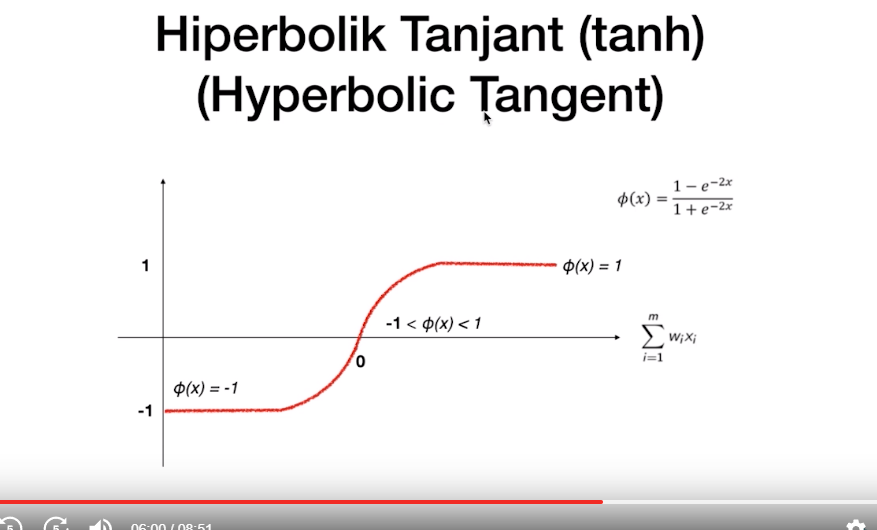

> customer churn analyze(Müşteri Kayıp-yayım Aanlizi)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/data/bilkav.com_Churn_Modelling.csv")
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

İlk üç kolon makine öğrenmesinde kullanılmaz. Ezberlemeye girebilir ya da direkt gereksizdir.

In [ ]:
X = df.iloc[:, 3:13].values
y = df.iloc[:,13].values

In [ ]:
 # Label Encoder ile ülkeleri ve cinsiyeti encode edelim.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
X[:, 1] = le.fit_transform(X[:,1])

# tekrardan fit transform yaptığımızdan le'de kullanılabilir
le2 = preprocessing.LabelEncoder()
X[:, 2] = le2.fit_transform(X[:,2])


# Ülkeler OneHotEncode edilmeli
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ohe = ColumnTransformer([("ohe", OneHotEncoder(dtype=float),[1])],
                        remainder="passthrough")

X = ohe.fit_transform(X)
# Coğrafya one hot encode edildiğin için siliyporız
X = X[:,1:]

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,
                                                    random_state=27)


sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
import keras

from keras.models import Sequential
from keras.layers import Dense
# Modelimiz
clf = Sequential()
#1. gizli katmanı ekliyopruz
clf.add(Dense(units=6, kernel_initializer="uniform",
              activation = "relu",
              input_dim = 11))

In [ ]:
# 2. gizli katmanı ekliyoruz.
clf.add(Dense(units=6, kernel_initializer="uniform",
              activation = "relu"))

In [ ]:
# Çıkış katmanı
clf.add(Dense(units=1, kernel_initializer="uniform",
              activation = "sigmoid"))

In [ ]:
# adam temelinde sgd'ye dayanıyor.
# Stotastik Graident Descent
# Yani bir tur atılsın, ardından giderek azalacak şekilde
#sinapsislerin ağırlığı düzeltilsin.

clf.compile(optimizer="adam",
            loss="binary_crossentropy",
            metrics=["binary_accuracy"],
            )

In [ ]:
clf.fit(X_train, y_train, epochs=50)



Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 0.5758 - binary_accuracy: 0.7949
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4376 - binary_accuracy: 0.7966
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4307 - binary_accuracy: 0.7966
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4274 - binary_accuracy: 0.7966
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4245 - binary_accuracy: 0.7966
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4216 - binary_accuracy: 0.7966
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4190 - binary_accuracy: 0.7980
Epoch 8/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4167 - binary_accuracy: 0.8230
Epoch 9/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4150 - binary_accuracy: 0.8260
Epoch 10/50
250/250 [================

In [ ]:
y_preds = clf.predict(X_test)

63/63 [==============================] - 0s 1ms/step


In [ ]:
y_pred = (y_preds > 0.5)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1549,   41],
       [ 286,  124]])

## XGBoost

In [ ]:
from xgboost import XGBClassifier
clf = XGBClassifier()
clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
y_preds = clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_preds)
cm

array([[1500,   90],
       [ 195,  215]])

##Boyut İndirgeme

### PCA (Principal Component Analysis)

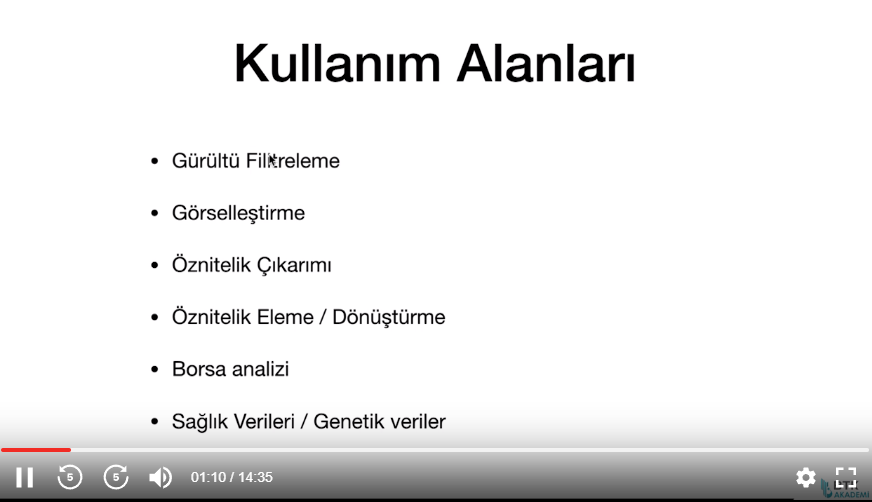

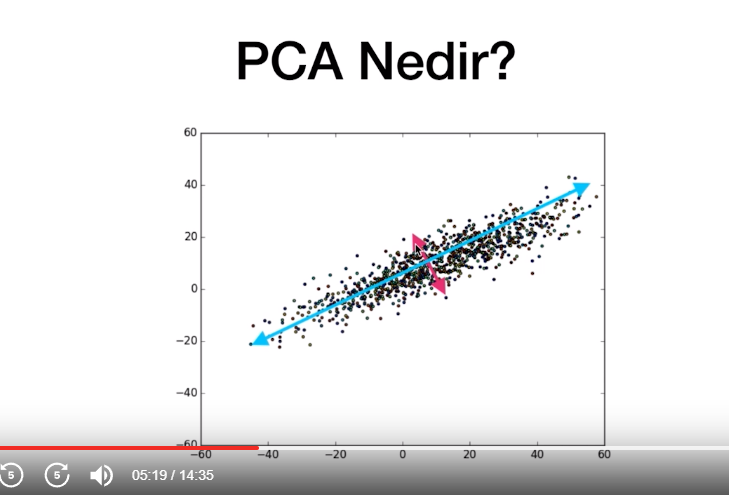

x ve y ekseni artık mavi ve mor doğrultular oldu. Boyut indirgerken bazen veri kaybolabilir.

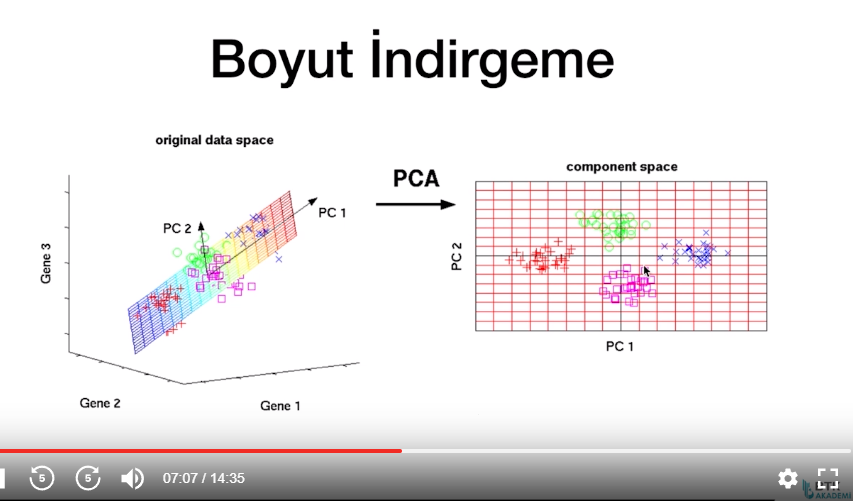

3 boyutlu veri 2 boyutlu hale getirildi. (Kayıp olabiliyor)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/data/bilkav.com_Wine.csv")
df.head()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  Customer_Segment  
0   3.92     1065                 1  
1   3.40     1050                 1  
2   3.17     1185                 1  
3   3.45     1480                 1  
4   2.93      735                 1

In [ ]:
X = df.iloc[:, 0:13].values
y = df.iloc[:, 13].values

In [ ]:
# split train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=27)

In [ ]:
#Scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train2 = pca.fit_transform(X_train)

In [ ]:
X_test2 = pca.transform(X_test)

In [ ]:
# before pca
from sklearn.linear_model import LogisticRegression
clf  = LogisticRegression(random_state=27)
clf.fit(X_train, y_train)

LogisticRegression(random_state=27)

In [ ]:
#after pca
clf2  = LogisticRegression(random_state=27)
clf2.fit(X_train2, y_train)

LogisticRegression(random_state=27)

In [ ]:
#tahminler
y_pred = clf.predict(X_test)
y_pred2 = clf2.predict(X_test2)

In [ ]:
#actual / PCA olmadan
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 7,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 14]])

Görüldüğü gibi mükemmel bir şekilde kümeleme yaptı.

In [ ]:
# actual / PCA ile
cm2 = confusion_matrix(y_test, y_pred2)
cm2

array([[ 6,  1,  0],
       [ 1, 14,  0],
       [ 0,  0, 14]])

13 column'dan 2column'a indi yani 6da1ine ama görüldüğü gibi hata oldukça az.

In [ ]:
# PCA öncesi / sonrası
cm3 = confusion_matrix(y_pred, y_pred2)
cm3

array([[ 6,  1,  0],
       [ 1, 14,  0],
       [ 0,  0, 14]])

Farklı durumlarda veri üzerine başarı artışı sağlanabilir. Öznitelik arttırılabilir.

### LDA Linear Discriminant Analysis

Önceden veriler etiketlenmiş olacak. Amaç, sınıfları en iyi ayıran boyutu bulmaktır.

https://sebastianraschka.com/Articles/2014_python_lda.html

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [ ]:
lda = LDA(n_components=2)

X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

In [ ]:
#after lda
clf_lda  = LogisticRegression(random_state=27)
clf_lda.fit(X_train_lda, y_train)

LogisticRegression(random_state=27)

In [ ]:
#tahminler lda
y_pred_lda = clf_lda.predict(X_test_lda)


In [ ]:
# actual / LDA
cm4 = confusion_matrix(y_pred, y_pred_lda)
cm4

array([[ 7,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 13]])

In [ ]:
# actual / PCA ile
cm2

array([[ 6,  1,  0],
       [ 1, 14,  0],
       [ 0,  0, 14]])

LDA sınıflandırmada PCA'yden çok daha başarılı.

## Modellerin Değerlendirilmesi ve Seçimi

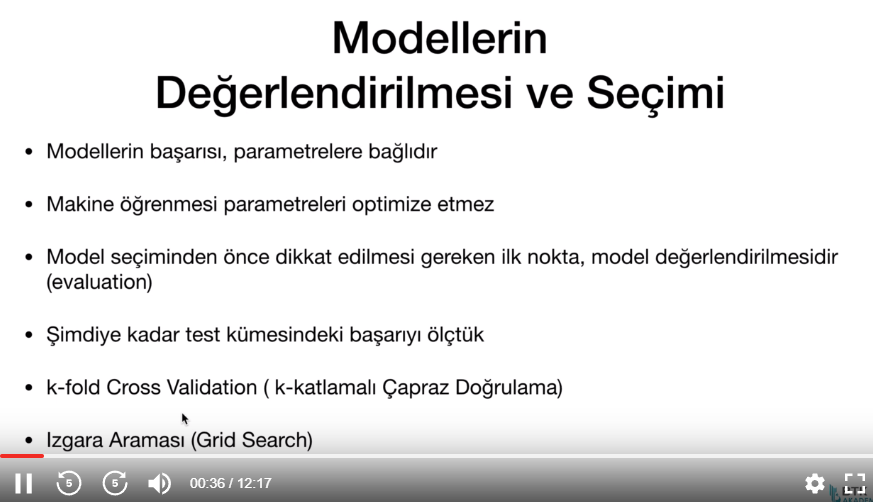

In [ ]:
from sklearn.model_selection import cross_val_score

basari = cross_val_score()

> Cross- Validation


from sklearn import datasets, linear_model

from sklearn.model_selection import cross_val_score

diabetes = datasets.load_diabetes()

X = diabetes.data[:150]

y = diabetes.target[:150]

lasso = linear_model.Lasso()

print(cross_val_score(lasso, X, y, cv=3))
[0.3315057  0.08022103 0.03531816]

> GridSearchCV

> RandomSearchCV

HyperParameter Tunning'de kullanılır.

##CNN(Convolutional Neural Network)

Temel mantık resimler arasındaki farkları algılamasıdır. Mutlu yüz ve üzgün yüz arasındaki farklılık algılanır ve etiketlenir.

In [ ]:
# Kadın - Erkek Classification (Resimlerle)

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Aug 15 04:18:20 2018

@author: sadievrenseker
"""
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

# ilkleme
classifier = Sequential()

# Adım 1 - Convolution
classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))

# Adım 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# 2. convolution katmanı
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adım 3 - Flattening
classifier.add(Flatten())

# Adım 4 - YSA
classifier.add(Dense(output_dim = 128, activation = 'relu'))
classifier.add(Dense(output_dim = 1, activation = 'sigmoid'))

# CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# CNN ve resimler

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

training_set = train_datagen.flow_from_directory('veriler/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 1,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('veriler/test_set',
                                            target_size = (64, 64),
                                            batch_size = 1,
                                            class_mode = 'binary')

classifier.fit_generator(training_set,
                         samples_per_epoch = 8000,
                         nb_epoch = 1,
                         validation_data = test_set,
                         nb_val_samples = 2000)

import numpy as np
import pandas as pd


test_set.reset()
pred=classifier.predict_generator(test_set,verbose=1)
#pred = list(map(round,pred))
pred[pred > .5] = 1
pred[pred <= .5] = 0

print('prediction gecti')
#labels = (training_set.class_indices)

test_labels = []

for i in range(0,int(203)):
    test_labels.extend(np.array(test_set[i][1]))

print('test_labels')
print(test_labels)

#labels = (training_set.class_indices)
'''
idx = []
for i in test_set:
    ixx = (test_set.batch_index - 1) * test_set.batch_size
    ixx = test_set.filenames[ixx : ixx + test_set.batch_size]
    idx.append(ixx)
    print(i)
    print(idx)
'''
dosyaisimleri = test_set.filenames
#abc = test_set.
#print(idx)
#test_labels = test_set.
sonuc = pd.DataFrame()
sonuc['dosyaisimleri']= dosyaisimleri
sonuc['tahminler'] = pred
sonuc['test'] = test_labels

from sklearn.metrics import confusion_matrix


cm = confusion_matrix(test_labels, pred)
print (cm)

